In [1]:
import pandas as pd
import numpy as np
import matplotlib. pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Input, SimpleRNN, GRU, LSTM, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam
from datetime import datetime, time
import calendar
import warnings
warnings.filterwarnings('ignore')

In [2]:
Airlines_Passengers = pd.read_csv('D:/ExcelRassignments/Assignment18/Airlines+Data.csv')
Airlines_Passengers.index.freq = 'MS'
Airlines_Passengers.head()

,Month,Passengers
0,01-01-1995,112
1,01-02-1995,118
2,01-03-1995,132
3,01-04-1995,129
4,01-05-1995,121


In [3]:
Airlines_Passengers['Month'] = pd.to_datetime(Airlines_Passengers['Month'], infer_datetime_format=True)
Airlines_Passengers.head()

,Month,Passengers
0,1995-01-01,112
1,1995-01-02,118
2,1995-01-03,132
3,1995-01-04,129
4,1995-01-05,121


## EDA

In [4]:
AP_df = Airlines_Passengers.copy()
AP_df.head()

,Month,Passengers
0,1995-01-01,112
1,1995-01-02,118
2,1995-01-03,132
3,1995-01-04,129
4,1995-01-05,121


In [5]:
AP_df.shape

(96, 2)

In [6]:
AP_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [7]:
AP_df[AP_df.duplicated()].shape

(0, 2)

In [8]:
AP_df.isna().sum()

Month         0
Passengers    0
dtype: int64

In [9]:
AP_df.count()

Month         96
Passengers    96
dtype: int64

In [10]:
AP_df.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


### Analyse the distribution of the data using histogram

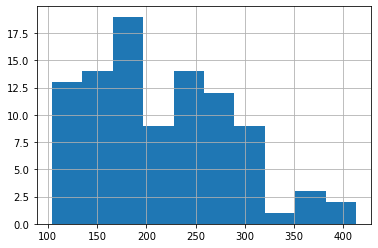

In [11]:
AP_df['Passengers'].hist()
plt.show()

In [12]:
dates = pd.date_range(start='1995-01-01', freq='MS', periods=len(AP_df))

In [13]:
AP_df['Month']= dates.month
AP_df['Year']= dates.year
AP_df['Date']= dates

In [14]:
AP_df['Month']= AP_df['Month'].apply(lambda x: calendar.month_abbr[x])

In [15]:
AP_df.set_index('Date', inplace=True)

In [16]:
AP_df.head()

,Month,Passengers,Year
Date,,,
1995-01-01,Jan,112,1995
1995-02-01,Feb,118,1995
1995-03-01,Mar,132,1995
1995-04-01,Apr,129,1995
1995-05-01,May,121,1995


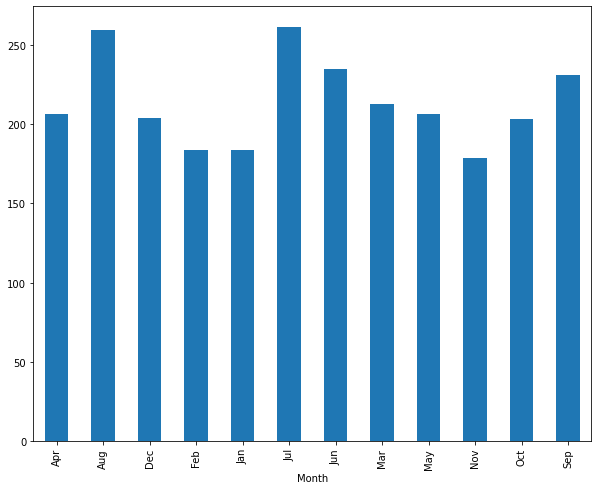

In [17]:
plt.figure(figsize=(10,8))
AP_df.groupby('Month')['Passengers'].mean().plot(kind= 'bar')
plt.show()

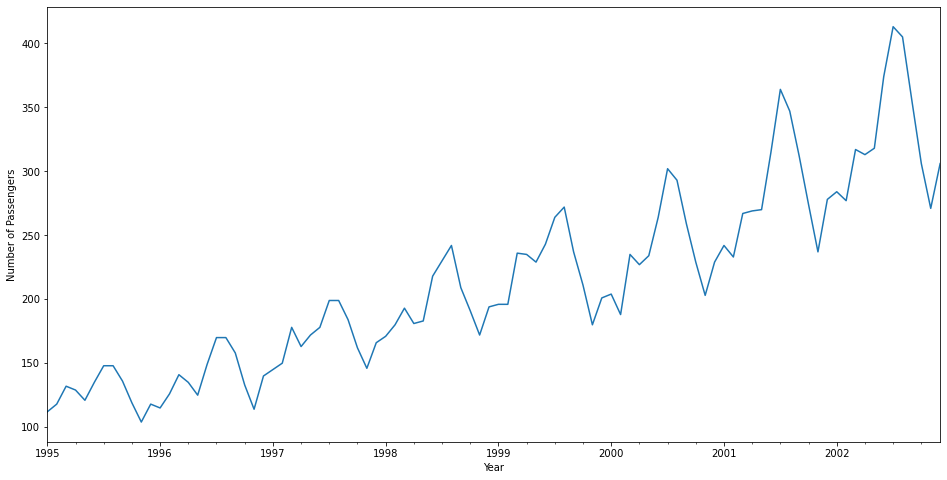

In [18]:
plt.figure(figsize=(16,8))
AP_df['Passengers'].plot()
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.show()

In [19]:
series = AP_df['Passengers']
result = sm.tsa.seasonal_decompose(series, model= 'multiplicative', extrapolate_trend = 8)

Text(0.5, 0.98, 'Passenger count time series decomposed into four components')

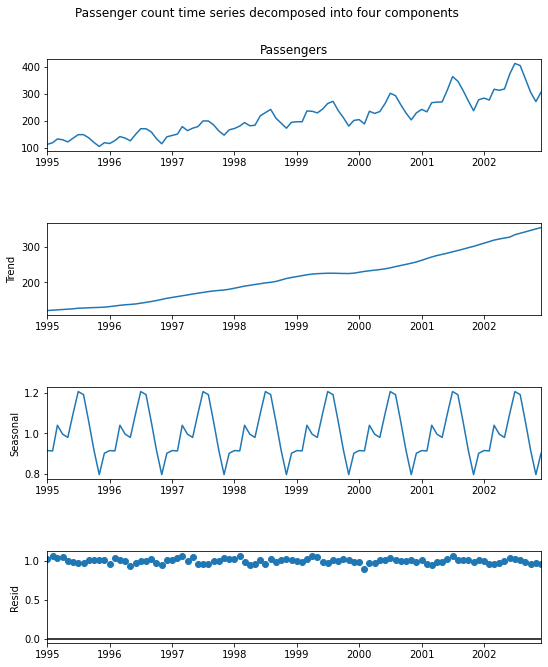

In [20]:
fig = result.plot()
fig.set_figheight(10)
fig.set_figwidth(8)
fig.suptitle('Passenger count time series decomposed into four components')

In [21]:
monthly = pd.pivot_table(data=AP_df, values='Passengers', index='Month', columns='Year')
monthly = monthly.reindex(index=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

In [22]:
monthly

Year,1995,1996,1997,1998,1999,2000,2001,2002
Month,,,,,,,,
Jan,112,115,145,171,196,204,242,284
Feb,118,126,150,180,196,188,233,277
Mar,132,141,178,193,236,235,267,317
Apr,129,135,163,181,235,227,269,313
May,121,125,172,183,229,234,270,318
Jun,135,149,178,218,243,264,315,374
Jul,148,170,199,230,264,302,364,413
Aug,148,170,199,242,272,293,347,405
Sep,136,158,184,209,237,259,312,355


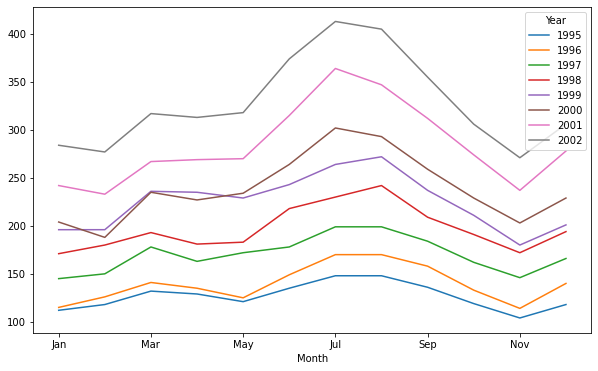

In [23]:
monthly.plot(figsize= (10,6))
plt.show()

In [24]:
AP_df.head()

,Month,Passengers,Year
Date,,,
1995-01-01,Jan,112,1995
1995-02-01,Feb,118,1995
1995-03-01,Mar,132,1995
1995-04-01,Apr,129,1995
1995-05-01,May,121,1995


## Visualization

<AxesSubplot:xlabel='Month', ylabel='Year'>

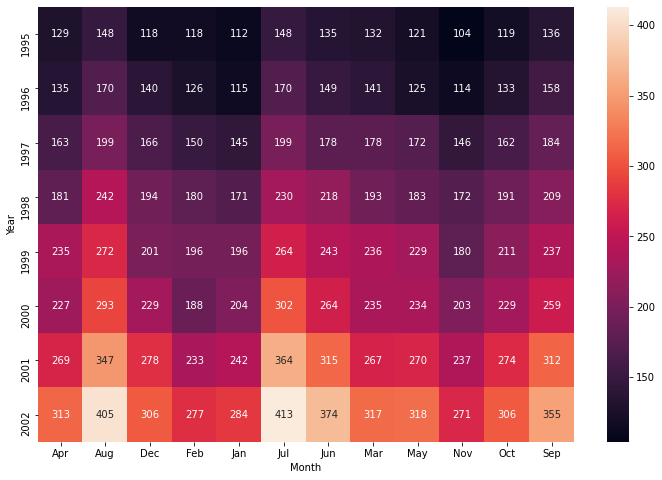

In [25]:
plt.figure(figsize=(12,8))
heatmap_y_month = pd.pivot_table(data=AP_df, values='Passengers', index='Year', columns='Month', aggfunc='mean', fill_value=0)
sns.heatmap(heatmap_y_month, annot=True, fmt='g')

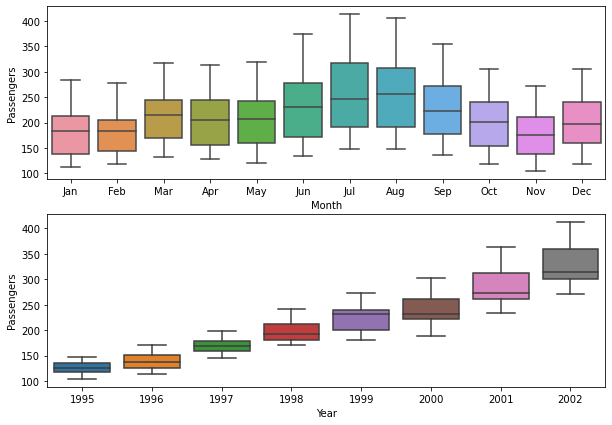

In [26]:
plt.figure(figsize=(10,7))
plt.subplot(211)
sns.boxplot(x= 'Month', y= 'Passengers', data=AP_df)
plt.subplot(212)
sns.boxplot(x='Year', y= 'Passengers', data=AP_df)
plt.show()

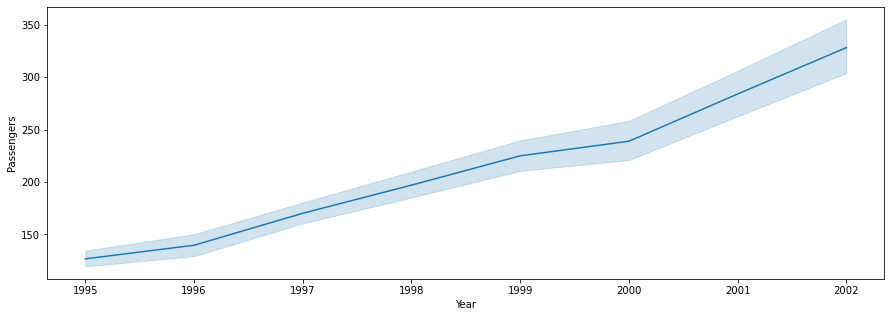

In [27]:
plt.figure(figsize=(15,5))
sns.lineplot(x='Year', y='Passengers', data=AP_df)
plt.show()

## Outlier Detection

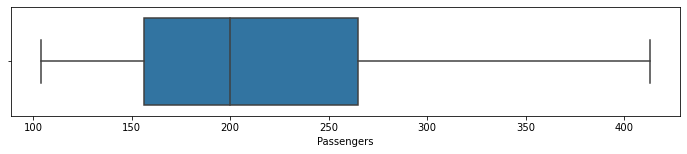

In [28]:
fig = plt.subplots(figsize = (12,2))
ax = sns.boxplot(AP_df['Passengers'], whis=1.5)

#### There is no outliers on the negative side of the lower whisker. 

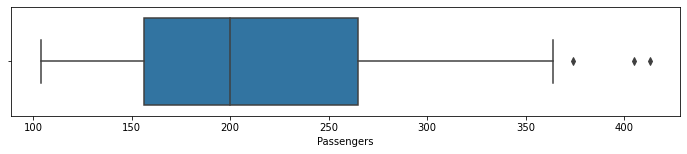

In [29]:
fig1 = plt.subplots(figsize = (12,2))
ax1 = sns.boxplot(AP_df['Passengers'], whis=1)

### Conclusion for selecting whis = 1.5

#### From above observations we should select whis= 1.5 because this will not miss any data in time series analysis.

## Run an ETS Decomposition

In [30]:
from statsmodels.tsa.seasonal import seasonal_decompose

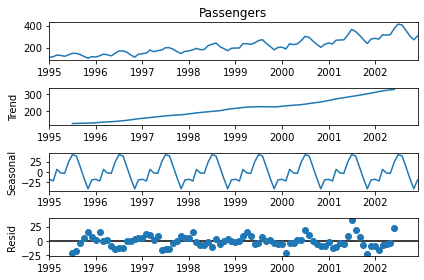

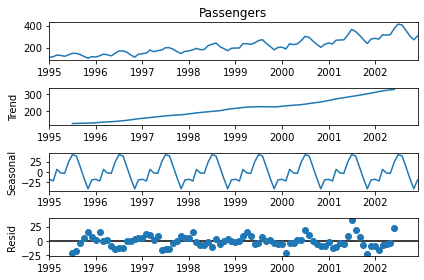

In [31]:
result = seasonal_decompose(AP_df['Passengers'], model= 'additive')
result.plot()

## Transformation

In [32]:
from matplotlib import pyplot

In [33]:
Series = pd.read_csv('D:/ExcelRassignments/Assignment18/Airlines+Data(1).csv', header=0, index_col=0, parse_dates=True)
Series.head()

,Passengers
Month,
Jan-95,112
Feb-95,118
Mar-95,132
Apr-95,129
May-95,121


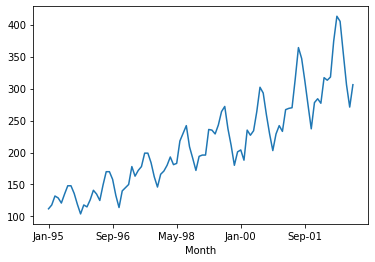

In [34]:
Series.Passengers.plot()
plt.show()

In [35]:
dataframe = pd.DataFrame(Series.values)
dataframe.columns=['Passengers']
dataframe['Passengers']= np.sqrt(dataframe['Passengers'])

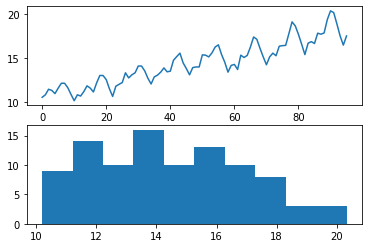

In [36]:
pyplot.subplot(211)
pyplot.plot(dataframe['Passengers'])    #Line Plot

pyplot.subplot(212)
pyplot.hist(dataframe['Passengers'])    #Histogram
pyplot.show()

## Log Transform

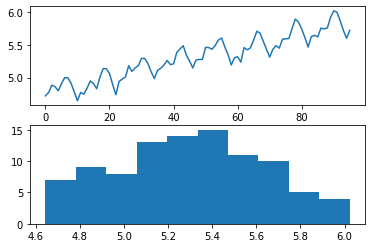

In [37]:
from numpy import log

dataframe1=pd.DataFrame(Series.values)
dataframe1.columns=['Passengers']
dataframe1['Passengers']=log(dataframe1['Passengers'])

pyplot.subplot(211)
pyplot.plot(dataframe1['Passengers'])       #Line Plot

pyplot.subplot(212)
pyplot.hist(dataframe1['Passengers'])        #Histogram
pyplot.show()

## Creating Dummy Variables

In [38]:
AP_df2 = pd.read_csv('D:/ExcelRassignments/Assignment18/Airlines+Data(1).csv')
AP_df2.index.freq = 'MS'
AP_df2.head()

,Month,Passengers
0,Jan-95,112
1,Feb-95,118
2,Mar-95,132
3,Apr-95,129
4,May-95,121


In [39]:
AP_df.head()

,Month,Passengers,Year
Date,,,
1995-01-01,Jan,112,1995
1995-02-01,Feb,118,1995
1995-03-01,Mar,132,1995
1995-04-01,Apr,129,1995
1995-05-01,May,121,1995


In [40]:
Series.head()

,Passengers
Month,
Jan-95,112
Feb-95,118
Mar-95,132
Apr-95,129
May-95,121


In [41]:
month = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

n=AP_df2['Month'][0]
n[0:3]
AP_df2['month']=0

for i in range(96):
    n= AP_df2['Month'][i]
    AP_df2['month'][i]=n[0:3]
    
dummy = pd.DataFrame(pd.get_dummies(AP_df2['month']))

AP = pd.concat((AP_df2, dummy), axis=1)
AP.head()

,Month,Passengers,month,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,Jan-95,112,Jan,0,0,0,0,1,0,0,0,0,0,0,0
1,Feb-95,118,Feb,0,0,0,1,0,0,0,0,0,0,0,0
2,Mar-95,132,Mar,0,0,0,0,0,0,0,1,0,0,0,0
3,Apr-95,129,Apr,1,0,0,0,0,0,0,0,0,0,0,0
4,May-95,121,May,0,0,0,0,0,0,0,0,1,0,0,0


In [42]:
AP1 = AP[['Month', 'Passengers', 'month', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']]

In [43]:
AP1.head()

,Month,Passengers,month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,Jan-95,112,Jan,1,0,0,0,0,0,0,0,0,0,0,0
1,Feb-95,118,Feb,0,1,0,0,0,0,0,0,0,0,0,0
2,Mar-95,132,Mar,0,0,1,0,0,0,0,0,0,0,0,0
3,Apr-95,129,Apr,0,0,0,1,0,0,0,0,0,0,0,0
4,May-95,121,May,0,0,0,0,1,0,0,0,0,0,0,0


   ## Creating t, t_square and log values

In [44]:
t = np.arange(1, 97)
AP1['t']=t

AP1['t_square']=AP1['t']*AP1['t']

log_Passengers = np.log(AP1['Passengers'])
AP1['log_Passengers']= log_Passengers

AP_df2= AP1[['Month', 'Passengers', 't', 't_square', 'log_Passengers', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'month']]

AP_df2

,Month,Passengers,t,t_square,log_Passengers,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,month
0,Jan-95,112,1,1,4.718499,1,0,0,0,0,0,0,0,0,0,0,0,Jan
1,Feb-95,118,2,4,4.770685,0,1,0,0,0,0,0,0,0,0,0,0,Feb
2,Mar-95,132,3,9,4.882802,0,0,1,0,0,0,0,0,0,0,0,0,Mar
3,Apr-95,129,4,16,4.859812,0,0,0,1,0,0,0,0,0,0,0,0,Apr
4,May-95,121,5,25,4.795791,0,0,0,0,1,0,0,0,0,0,0,0,May
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,Aug-02,405,92,8464,6.003887,0,0,0,0,0,0,0,1,0,0,0,0,Aug
92,Sep-02,355,93,8649,5.872118,0,0,0,0,0,0,0,0,1,0,0,0,Sep
93,Oct-02,306,94,8836,5.723585,0,0,0,0,0,0,0,0,0,1,0,0,Oct
94,Nov-02,271,95,9025,5.602119,0,0,0,0,0,0,0,0,0,0,1,0,Nov


In [45]:
AP_df2['Date'] = pd.to_datetime(AP_df2.Month, format='%b-%y')
AP_df2['year'] = AP_df2.Date.dt.strftime('%Y')                                       #Year Extraction
AP_df2.head()

,Month,Passengers,t,t_square,log_Passengers,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,month,Date,year
0,Jan-95,112,1,1,4.718499,1,0,0,0,0,0,0,0,0,0,0,0,Jan,1995-01-01,1995
1,Feb-95,118,2,4,4.770685,0,1,0,0,0,0,0,0,0,0,0,0,Feb,1995-02-01,1995
2,Mar-95,132,3,9,4.882802,0,0,1,0,0,0,0,0,0,0,0,0,Mar,1995-03-01,1995
3,Apr-95,129,4,16,4.859812,0,0,0,1,0,0,0,0,0,0,0,0,Apr,1995-04-01,1995
4,May-95,121,5,25,4.795791,0,0,0,0,1,0,0,0,0,0,0,0,May,1995-05-01,1995


## Time Series Decomposition

### Splitting Data

In [46]:
Train = AP_df2.head(84)
Test = AP_df2.tail(12)

### Linear Model

In [47]:
import statsmodels.formula.api as smf

In [48]:
linear_m = smf.ols('Passengers~t', data=Train).fit()
pred_linear = pd.Series(linear_m.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_linear))**2))
rmse_linear

53.19923653480265

### Exponential

In [49]:
Exp = smf.ols('log_Passengers~t', data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

46.05736110315613

### Quadratic

In [50]:
Quad = smf.ols('Passengers~t+t_square', data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[['t', 't_square']]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_Quad))**2))
rmse_Quad

48.05188897933156

### Additive Seasonality

In [51]:
add_sea = smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov', data=Train).fit()
pred_add = pd.Series(add_sea.predict(Test[['Jan','Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov']]))
rmse_add = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add))**2))
rmse_add

132.8197848142182

### Additive Seasonality Quadratic

In [52]:
add_Quad = smf.ols('Passengers~t+t_square+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov', data=Train).fit()
pred_add_Quad = pd.Series(add_Quad.predict(Test[['Jan','Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov','t', 't_square']]))
rmse_add_Quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_Quad))**2))
rmse_add_Quad

26.360817612081423

### Multiplicative Seasonality

In [53]:
Mul_sea= smf.ols('log_Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov', data=Train).fit()
pred_Mult_sea=pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea= np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_sea)))**2)) 
rmse_Mult_sea

140.0632020470866

### Multiplicative Additive Seasonality

In [54]:
Mul_Add_sea = smf.ols('log_Passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea

10.519172544323887

### Compare the Results

In [55]:
data = {'MODEL':pd.Series(['rmse_linear', 'rmse_Exp', 'rmse_Quad', 'rmse_add', 'rmse_add_Quad', 'rmse_Mult_sea', 'rmse_Mult_add_sea']), 'RMSE_Values':pd.Series([rmse_linear, rmse_Exp, rmse_Quad, rmse_add, rmse_add_Quad, rmse_Mult_sea, rmse_Mult_add_sea])}
table_rmse = pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
6,rmse_Mult_add_sea,10.519173
4,rmse_add_Quad,26.360818
1,rmse_Exp,46.057361
2,rmse_Quad,48.051889
0,rmse_linear,53.199237
3,rmse_add,132.819785
5,rmse_Mult_sea,140.063202


### Observation => 12 dummy variables were created, as per above RMSE values, I have selected Multiplicative Additive Seasonality model for my forecasting algorithm. 

## Predict for new time period

In [56]:
predict1 = AP_df2.copy()
predict1.head()

,Month,Passengers,t,t_square,log_Passengers,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,month,Date,year
0,Jan-95,112,1,1,4.718499,1,0,0,0,0,0,0,0,0,0,0,0,Jan,1995-01-01,1995
1,Feb-95,118,2,4,4.770685,0,1,0,0,0,0,0,0,0,0,0,0,Feb,1995-02-01,1995
2,Mar-95,132,3,9,4.882802,0,0,1,0,0,0,0,0,0,0,0,0,Mar,1995-03-01,1995
3,Apr-95,129,4,16,4.859812,0,0,0,1,0,0,0,0,0,0,0,0,Apr,1995-04-01,1995
4,May-95,121,5,25,4.795791,0,0,0,0,1,0,0,0,0,0,0,0,May,1995-05-01,1995


In [57]:
predict1 = predict1.drop('month', axis=1)
predict1 = predict1.drop('Date', axis=1)
predict1 = predict1.drop('year', axis=1)

In [58]:
model_full = smf.ols('log_Passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov', data=AP_df2).fit()

In [59]:
pred_new = pd.Series(Mul_Add_sea.predict(predict1))
predict1['Forecasted_Passengers']=pd.Series(pred_new)
predict1

,Month,Passengers,t,t_square,log_Passengers,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Forecasted_Passengers
0,Jan-95,112,1,1,4.718499,1,0,0,0,0,0,0,0,0,0,0,0,4.692645
1,Feb-95,118,2,4,4.770685,0,1,0,0,0,0,0,0,0,0,0,0,4.708238
2,Mar-95,132,3,9,4.882802,0,0,1,0,0,0,0,0,0,0,0,0,4.852602
3,Apr-95,129,4,16,4.859812,0,0,0,1,0,0,0,0,0,0,0,0,4.816871
4,May-95,121,5,25,4.795791,0,0,0,0,1,0,0,0,0,0,0,0,4.807152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,Aug-02,405,92,8464,6.003887,0,0,0,0,0,0,0,1,0,0,0,0,5.972648
92,Sep-02,355,93,8649,5.872118,0,0,0,0,0,0,0,0,1,0,0,0,5.865485
93,Oct-02,306,94,8836,5.723585,0,0,0,0,0,0,0,0,0,1,0,0,5.738005
94,Nov-02,271,95,9025,5.602119,0,0,0,0,0,0,0,0,0,0,1,0,5.606271


## Naive Method

In [60]:
naive = AP_df.copy()
naive.head()

,Month,Passengers,Year
Date,,,
1995-01-01,Jan,112,1995
1995-02-01,Feb,118,1995
1995-03-01,Mar,132,1995
1995-04-01,Apr,129,1995
1995-05-01,May,121,1995


In [61]:
train_len=84
train_naive = naive.head(84)
test_naive = naive.tail(12)

In [62]:
naive_train = np.asarray(train_naive.Passengers)
lastvalue=naive_train[len(naive_train)-1]
y_hat = test_naive.copy()
y_hat['NaiveForecast']=lastvalue

In [63]:
y_hat.head()

,Month,Passengers,Year,NaiveForecast
Date,,,,
2002-01-01,Jan,284,2002,278
2002-02-01,Feb,277,2002,278
2002-03-01,Mar,317,2002,278
2002-04-01,Apr,313,2002,278
2002-05-01,May,318,2002,278


## Plot train and Forecast data

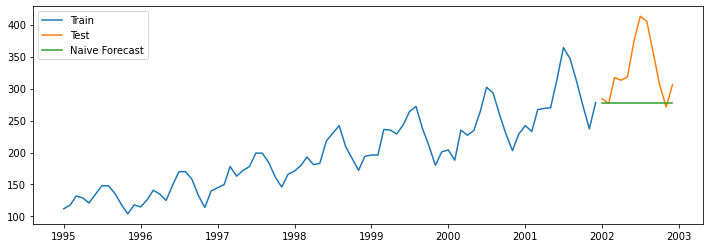

In [64]:
plt.figure(figsize=(12,4))
plt.plot(train_naive['Passengers'], label='Train')
plt.plot(test_naive['Passengers'], label='Test')
plt.plot(y_hat['NaiveForecast'], label='Naive Forecast')
plt.legend(loc='best')
plt.show()

## Evaluate the Model

In [65]:
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
from math import sqrt

In [66]:
mse_naive = mean_squared_error(test_naive.Passengers, y_hat['NaiveForecast'])
mse_naive.round(2)

4624.92

In [67]:
rmse_Naive = rmse(test_naive.Passengers, y_hat['NaiveForecast'])
rmse_Naive.round(2)

68.01

In [68]:
Naive1 = {'Model': pd.Series(['Naive Method']), 'RMSE': pd.Series([rmse_Naive]), 'MSE': pd.Series([mse_naive])}
Naive1=pd.DataFrame(Naive1)
Naive1

,Model,RMSE,MSE
0,Naive Method,68.00674,4624.916667


### Observation 

#### 1) All the values are same as we assigned all the forecasting records to the last value of the train set.
#### 2) The forecasting is undervalued when compared to the actual test data value.

## Moving Average

In [69]:
AP_Average = naive.copy()
AP_Average.head()

,Month,Passengers,Year
Date,,,
1995-01-01,Jan,112,1995
1995-02-01,Feb,118,1995
1995-03-01,Mar,132,1995
1995-04-01,Apr,129,1995
1995-05-01,May,121,1995


## Simple Moving Average

In [70]:
AP_Average['6-month-SMA']=AP_Average['Passengers'].rolling(window=6).mean()
AP_Average['12-month-SMA']=AP_Average['Passengers'].rolling(window=12).mean()

In [71]:
AP_Average.head(15)

,Month,Passengers,Year,6-month-SMA,12-month-SMA
Date,,,,,
1995-01-01,Jan,112,1995,NaN,NaN
1995-02-01,Feb,118,1995,NaN,NaN
1995-03-01,Mar,132,1995,NaN,NaN
1995-04-01,Apr,129,1995,NaN,NaN
1995-05-01,May,121,1995,NaN,NaN
1995-06-01,Jun,135,1995,124.500000,NaN
1995-07-01,Jul,148,1995,130.500000,NaN
1995-08-01,Aug,148,1995,135.500000,NaN
1995-09-01,Sep,136,1995,136.166667,NaN


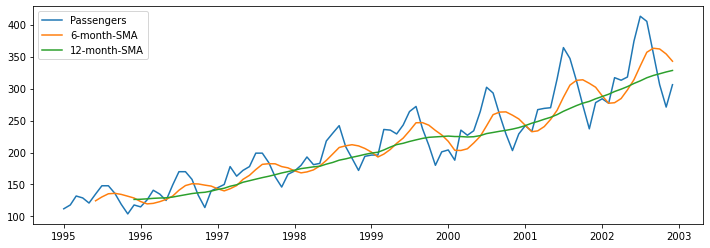

In [72]:
plt.figure(figsize=(12,4))
plt.plot(AP_Average['Passengers'], label='Passengers')
plt.plot(AP_Average['6-month-SMA'], label ='6-month-SMA')
plt.plot(AP_Average['12-month-SMA'], label='12-month-SMA')
plt.legend(loc='best')
plt.show()

## Evaluate the Model

In [73]:
y_hat_ma = AP_Average.copy()

In [74]:
train_ap = AP_Average['Passengers'].head(84)
test_ap = AP_Average['Passengers'].tail(12)

In [75]:
ma_window = 12

In [76]:
y_hat_ma['ma_forecast']=AP_Average['Passengers'].rolling(ma_window).mean()

In [77]:
train_ma1 = train_ap[len(train_ap)-1]

In [78]:
y_hat_ma['ma_forecast']=train_ma1

In [79]:
y_hat_ma.head()

,Month,Passengers,Year,6-month-SMA,12-month-SMA,ma_forecast
Date,,,,,,
1995-01-01,Jan,112,1995,NaN,NaN,278
1995-02-01,Feb,118,1995,NaN,NaN,278
1995-03-01,Mar,132,1995,NaN,NaN,278
1995-04-01,Apr,129,1995,NaN,NaN,278
1995-05-01,May,121,1995,NaN,NaN,278


In [80]:
rmse_ap = np.sqrt(mean_squared_error(test_ap, y_hat_ma['ma_forecast'][train_len:])).round(2)
rmse_ap

68.01

In [81]:
mse_ap = mean_squared_error(test_ap, y_hat_ma['ma_forecast'][train_len:]).round(2)
mse_ap.round(2)

4624.92

In [82]:
Moving_Average= {'MODEL': pd.Series(['Simple Moving Average Method']), 'RMSE':pd.Series([rmse_ap]), 'MSE':pd.Series([mse_ap])}
Moving_Average=pd.DataFrame(Moving_Average)
Moving_Average

,MODEL,RMSE,MSE
0,Simple Moving Average Method,68.01,4624.92


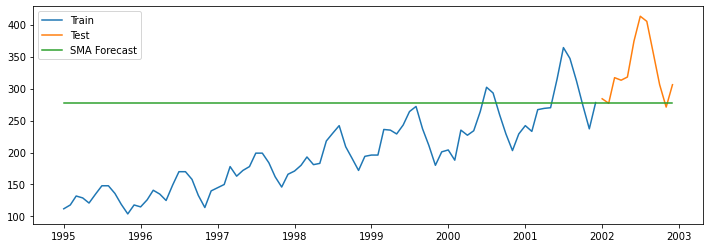

In [83]:
plt.figure(figsize=(12,4))
plt.plot(train_ap, label= 'Train')
plt.plot(test_ap, label='Test')
plt.plot(y_hat_ma['ma_forecast'], label='SMA Forecast')
plt.legend(loc='best')
plt.show()

   ## Exponentially Weighted Moving Average

In [90]:
EWMA = AP_df.copy()

In [91]:
AP_Average.head()

,Month,Passengers,Year,6-month-SMA,12-month-SMA
Date,,,,,
1995-01-01,Jan,112,1995,NaN,NaN
1995-02-01,Feb,118,1995,NaN,NaN
1995-03-01,Mar,132,1995,NaN,NaN
1995-04-01,Apr,129,1995,NaN,NaN
1995-05-01,May,121,1995,NaN,NaN


In [92]:
EWMA.head()

,Month,Passengers,Year
Date,,,
1995-01-01,Jan,112,1995
1995-02-01,Feb,118,1995
1995-03-01,Mar,132,1995
1995-04-01,Apr,129,1995
1995-05-01,May,121,1995


In [93]:
EWMA['EWMA12']=AP_Average['Passengers'].ewm(span=12, adjust=False).mean()

In [94]:
EWMA.head()

,Month,Passengers,Year,EWMA12
Date,,,,
1995-01-01,Jan,112,1995,112.000000
1995-02-01,Feb,118,1995,112.923077
1995-03-01,Mar,132,1995,115.857988
1995-04-01,Apr,129,1995,117.879836
1995-05-01,May,121,1995,118.359861


In [95]:
EWMA['EWMA12']

Date
1995-01-01    112.000000
1995-02-01    112.923077
1995-03-01    115.857988
1995-04-01    117.879836
1995-05-01    118.359861
                 ...    
2002-08-01    335.501047
2002-09-01    338.500886
2002-10-01    333.500749
2002-11-01    323.885249
2002-12-01    321.133673
Name: EWMA12, Length: 96, dtype: float64

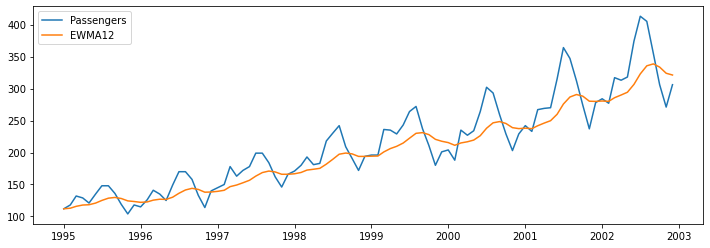

In [96]:
plt.figure(figsize=(12,4))
plt.plot(EWMA['Passengers'], label = 'Passengers')
plt.plot(EWMA['EWMA12'], label= 'EWMA12')
plt.legend(loc='best')
plt.show()

## Evaluate the Model

In [97]:
y_hat_ewma = EWMA.copy()

In [98]:
train_ewma= AP_df['Passengers'].head(84)
test_ewma = AP_df['Passengers'].tail(12)

In [99]:
ewma = train_ewma[len(train_ewma)-1]

In [100]:
y_hat_ewma['EWMA_Forecast']=ewma

In [101]:
mse_ewma = mean_squared_error(test_ewma, y_hat_ewma['EWMA_Forecast'][train_len:]).round(2)
mse_ewma

4624.92

In [102]:
rmse_ewma = np.sqrt(mean_squared_error(test_ewma, y_hat_ewma['EWMA_Forecast'][train_len:])).round(2)
rmse_ewma

68.01

In [103]:
EWMA ={'MODEL': pd.Series(['Exponentially Weighted Moving Average']), 'RMSE':pd.Series([rmse_ewma]), 'MSE':pd.Series([mse_ewma])}
EWMA= pd.DataFrame(EWMA)
EWMA

,MODEL,RMSE,MSE
0,Exponentially Weighted Moving Average,68.01,4624.92


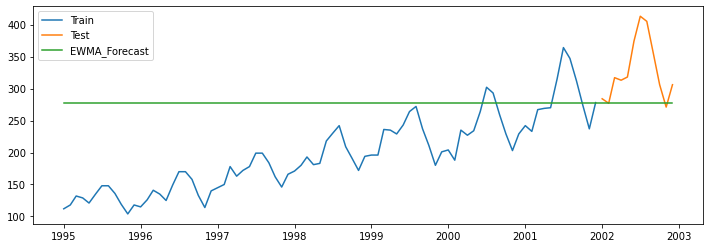

In [104]:
plt.figure(figsize=(12,4))
plt.plot(train_ewma, label='Train')
plt.plot(test_ewma, label='Test')
plt.plot(y_hat_ewma['EWMA_Forecast'], label='EWMA_Forecast')
plt.legend(loc='best')
plt.show()

## Comparing SMA to EWMA

### Exponential Smoothing Techniques

#### 1) Single Exponential Smoothing (SES-Level)
#### 2) Double Exponential Smoothing (Holt's Method-Level+Trend)
#### 3) Holt Winter Method(Level+Trend+Seasonality)

In [105]:
AP_EST = AP_df.copy()
AP_EST.head()

,Month,Passengers,Year
Date,,,
1995-01-01,Jan,112,1995
1995-02-01,Feb,118,1995
1995-03-01,Mar,132,1995
1995-04-01,Apr,129,1995
1995-05-01,May,121,1995


## Single Exponential Smoothing

In [106]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
span = 12
alpha = 2/(span+1)

In [107]:
model_ses12 = SimpleExpSmoothing(AP_EST['Passengers'])
fitted_model= model_ses12.fit(smoothing_level=alpha, optimized=False)
AP_EST['SES12']=fitted_model.fittedvalues.shift(-1)
AP_EST.head()

,Month,Passengers,Year,SES12
Date,,,,
1995-01-01,Jan,112,1995,112.000000
1995-02-01,Feb,118,1995,112.923077
1995-03-01,Mar,132,1995,115.857988
1995-04-01,Apr,129,1995,117.879836
1995-05-01,May,121,1995,118.359861


## Evaluate Model

In [108]:
train_ses = AP_EST.head(84)
test_ses = AP_EST.tail(12)

In [109]:
ses_model= SimpleExpSmoothing(train_ses['Passengers']).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start=test_ses.index[0], end=test_ses.index[-1])

In [110]:
mse_ses = mean_squared_error(test_ses.Passengers, pred_ses)
mse_ses.round(2)

4204.84

In [111]:
rmse_ses = np.sqrt(mean_squared_error(test_ses.Passengers, pred_ses)).round(2)
rmse_ses

64.84

In [112]:
SES = {'Model':pd.Series(['Single Exponential Smoothing']), 'RMSE':pd.Series([rmse_ses]),'MSE':pd.Series([mse_ses])}
SES = pd.DataFrame(SES)
SES.round(2)

,Model,RMSE,MSE
0,Single Exponential Smoothing,64.84,4204.84


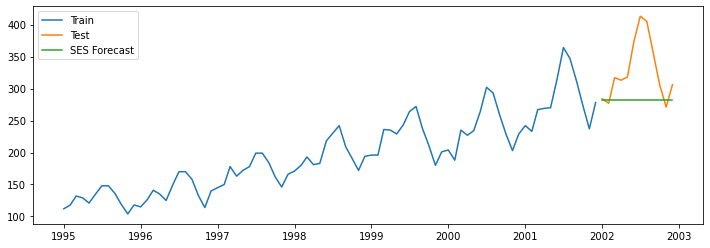

In [113]:
plt.figure(figsize=(12,4))
plt.plot(train_ses['Passengers'], label= 'Train')
plt.plot(test_ses['Passengers'], label='Test')
plt.plot(pred_ses, label='SES Forecast')
plt.legend(loc= 'best')
plt.show()

## Double Exponential Smoothing

In [116]:
AP_DES = AP_df.copy()
AP_DES.head()

,Month,Passengers,Year
Date,,,
1995-01-01,Jan,112,1995
1995-02-01,Feb,118,1995
1995-03-01,Mar,132,1995
1995-04-01,Apr,129,1995
1995-05-01,May,121,1995


In [115]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

model_dse = ExponentialSmoothing(AP_DES['Passengers'], trend='add')
fitted_model1=model_dse.fit()
AP_EST['DESadd12']=fitted_model1.fittedvalues.shift(-1)
AP_EST.head()

,Month,Passengers,Year,SES12,DESadd12
Date,,,,,
1995-01-01,Jan,112,1995,112.000000,113.906690
1995-02-01,Feb,118,1995,112.923077,119.892348
1995-03-01,Mar,132,1995,115.857988,133.875482
1995-04-01,Apr,129,1995,117.879836,130.912884
1995-05-01,May,121,1995,118.359861,122.923301


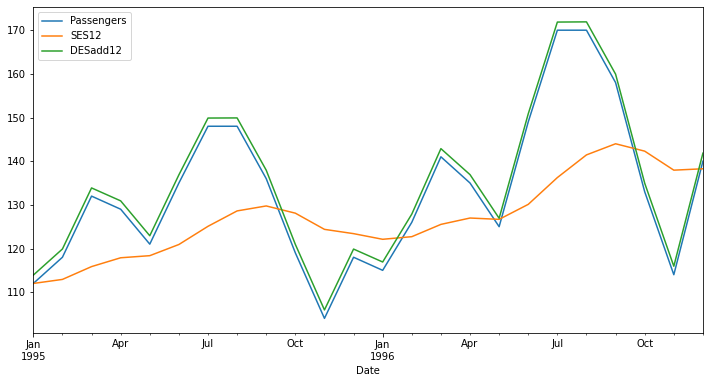

In [117]:
AP_EST[['Passengers', 'SES12', 'DESadd12']].iloc[:24].plot(figsize = (12,6)).autoscale(axis='x', tight=True);

## Observation => DESadd12 Green line is following orginal line

In [118]:
model_add12 = ExponentialSmoothing(AP_EST['Passengers'], trend='mul')
fitted_model2=model_add12.fit()
AP_EST['DESmul12']=fitted_model2.fittedvalues.shift(-1)
AP_EST.head().dropna()

,Month,Passengers,Year,SES12,DESadd12,DESmul12
Date,,,,,,
1995-01-01,Jan,112,1995,112.000000,113.906690,110.800278
1995-02-01,Feb,118,1995,112.923077,119.892348,117.037015
1995-03-01,Mar,132,1995,115.857988,133.875482,131.616058
1995-04-01,Apr,129,1995,117.879836,130.912884,128.600136
1995-05-01,May,121,1995,118.359861,122.923301,120.340645


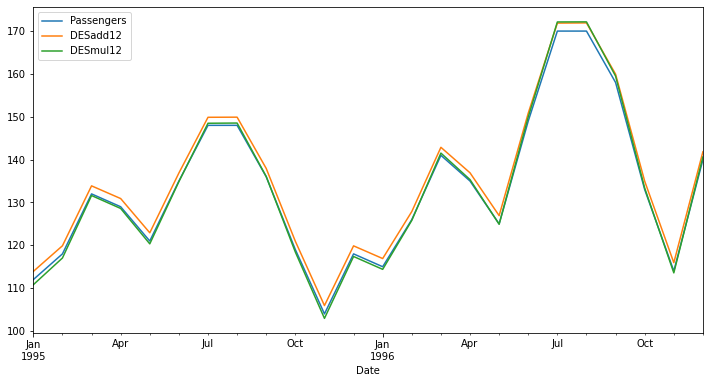

In [119]:
AP_EST[['Passengers','DESadd12', 'DESmul12']].iloc[:24].plot(figsize=(12, 6)).autoscale(axis='x', tight=True)

## Evaluate Model

In [120]:
train_des = AP_DES.head(84)
test_des = AP_DES.tail(12)

In [121]:
model_dse= ExponentialSmoothing(train_des['Passengers']).fit()
pred_des = model_dse.predict(start=test_des.index[0], end=test_des.index[-1])

In [122]:
mse_des = mean_squared_error(test_des.Passengers, pred_des)
mse_des.round(2)

4624.92

In [123]:
rmse_des = np.sqrt(mean_squared_error(test_des.Passengers, pred_des)).round(2)
rmse_des

68.01

In [124]:
DES = {'MODEL':pd.Series(['Double Exponential Smoothing']), 'RMSE':pd.Series([rmse_des]), 'MSE':pd.Series([mse_des])}
DES=pd.DataFrame(DES)
DES.round(2)

,MODEL,RMSE,MSE
0,Double Exponential Smoothing,68.01,4624.92


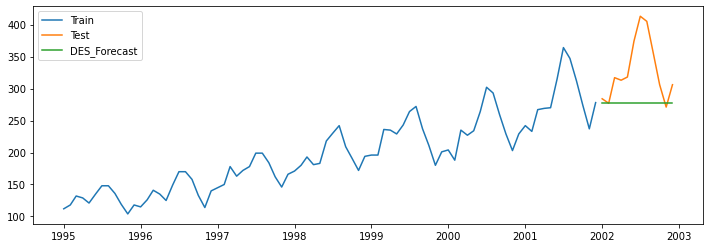

In [126]:
plt.figure(figsize=(12,4))
plt.plot(train_des['Passengers'], label='Train')
plt.plot(test_des['Passengers'], label='Test')
plt.plot(pred_des, label='DES_Forecast')
plt.legend(loc='best')
plt.show()

## Triple Exponential Smoothing

In [127]:
AP_EST['TESadd12']=ExponentialSmoothing(AP_EST['Passengers'], trend='add', seasonal='add', seasonal_periods=12).fit().fittedvalues
AP_EST.head()

,Month,Passengers,Year,SES12,DESadd12,DESmul12,TESadd12
Date,,,,,,,
1995-01-01,Jan,112,1995,112.000000,113.906690,110.800278,111.999918
1995-02-01,Feb,118,1995,112.923077,119.892348,117.037015,119.929664
1995-03-01,Mar,132,1995,115.857988,133.875482,131.616058,134.246457
1995-04-01,Apr,129,1995,117.879836,130.912884,128.600136,130.736066
1995-05-01,May,121,1995,118.359861,122.923301,120.340645,123.861338


In [128]:
AP_EST['TESmul12']=ExponentialSmoothing(AP_EST['Passengers'], trend='mul', seasonal='mul', seasonal_periods=12).fit().fittedvalues
AP_EST.head()

,Month,Passengers,Year,SES12,DESadd12,DESmul12,TESadd12,TESmul12
Date,,,,,,,,
1995-01-01,Jan,112,1995,112.000000,113.906690,110.800278,111.999918,113.645041
1995-02-01,Feb,118,1995,112.923077,119.892348,117.037015,119.929664,111.327132
1995-03-01,Mar,132,1995,115.857988,133.875482,131.616058,134.246457,134.355855
1995-04-01,Apr,129,1995,117.879836,130.912884,128.600136,130.736066,129.668611
1995-05-01,May,121,1995,118.359861,122.923301,120.340645,123.861338,129.739619


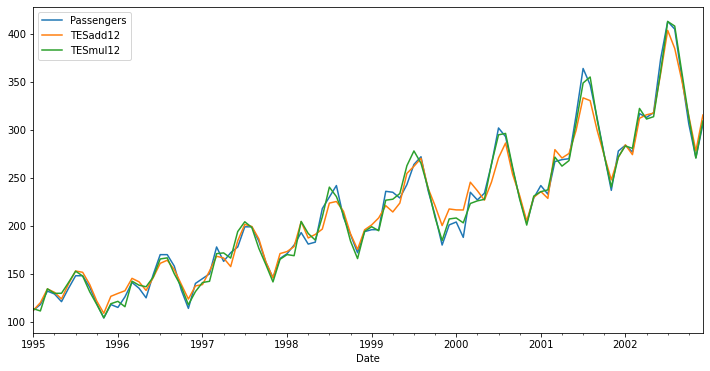

In [129]:
AP_EST[['Passengers','TESadd12','TESmul12']].plot(figsize=(12,6)).autoscale(axis='x',tight=True)

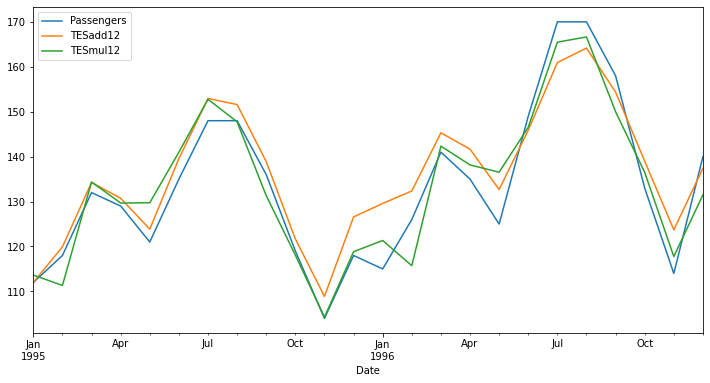

In [130]:
AP_EST[['Passengers','TESadd12','TESmul12']].iloc[:24].plot(figsize=(12,6)).autoscale(axis='x', tight=True)

## Evaluate Model

In [131]:
hwm=AP_DES.copy()

In [138]:
train_hwm=AP_DES.head(84)
test_hwm=AP_DES.tail(12)

In [139]:
hwm_model_add = ExponentialSmoothing(train_hwm["Passengers"],seasonal="add",trend="add",seasonal_periods=12,damped=True).fit()
pred_hwm_add = hwm_model_add.predict(start = test_hwm.index[0],end = test_hwm.index[-1])

In [140]:
mse_hwm_add=mean_squared_error(test_hwm.Passengers, pred_hwm_add)
mse_hwm_add.round(2)

983.07

In [136]:
rmse_hwm_add = np.sqrt(mean_squared_error(test_hwm.Passengers, pred_hwm_add)).round(2)
rmse_hwm_add

31.35

In [141]:
hwm_model_mul=ExponentialSmoothing(train_hwm['Passengers'],seasonal="mul",trend="add", seasonal_periods=12).fit()
pred_hwm_mul=hwm_model_mul.predict(start =test_hwm.index[0],end=test_hwm.index[-1])

In [142]:
mse_hwm_mul=mean_squared_error(test_hwm.Passengers, pred_hwm_mul)
mse_hwm_mul.round(2)

166.93

In [143]:
rmse_hwm_mul=np.sqrt(mean_squared_error(test_hwm.Passengers, pred_hwm_mul)).round(2)
rmse_hwm_mul

12.92

In [144]:
HWM_Additive={"MODEL":pd.Series(["Holt Winters Method_Additive"]),"RMSE":pd.Series([rmse_hwm_add]),"MSE":pd.Series([mse_hwm_add])}
HWM_Additive=pd.DataFrame(HWM_Additive)
HWM_Additive.round(2)

,MODEL,RMSE,MSE
0,Holt Winters Method_Additive,31.35,983.07


In [145]:
HWM_Multiplicative={"MODEL":pd.Series(["Holt Winters Method_Multiplicative"]),"RMSE":pd.Series([rmse_hwm_mul]),"MSE":pd.Series([mse_hwm_mul])}
HWM_Multiplicative=pd.DataFrame(HWM_Multiplicative)
HWM_Multiplicative.round(2)

,MODEL,RMSE,MSE
0,Holt Winters Method_Multiplicative,12.92,166.93


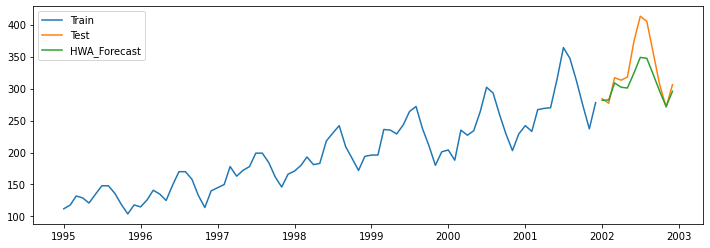

In [146]:
plt.figure(figsize=(12,4))
plt.plot(train_hwm['Passengers'], label='Train')
plt.plot(test_hwm['Passengers'], label='Test')
plt.plot(pred_hwm_add, label='HWA_Forecast')
plt.legend(loc='best')
plt.show()

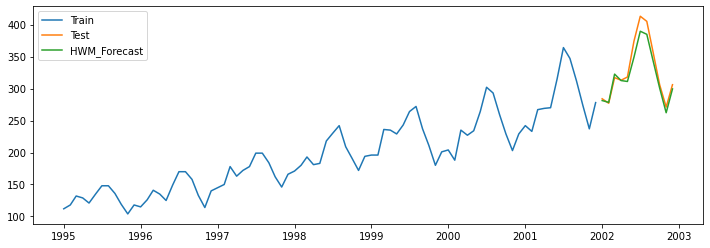

In [147]:
plt.figure(figsize=(12,4))
plt.plot(train_hwm['Passengers'], label='Train')
plt.plot(test_hwm['Passengers'], label='Test')
plt.plot(pred_hwm_mul, label='HWM_Forecast')
plt.legend(loc='best')
plt.show()

## ARMA Model

### Auto Regression Model

### Stationary vs Non-Stationary Time Series

In [148]:
AR_df=pd.read_csv('D:/ExcelRassignments/Assignment18/Airlines+Data.csv') #index_col='Month', parse_dates=True

In [149]:
AR_df.head()

,Month,Passengers
0,01-01-1995,112
1,01-02-1995,118
2,01-03-1995,132
3,01-04-1995,129
4,01-05-1995,121


In [150]:
AR_df['Month']=pd.to_datetime(AR_df['Month'])
AR_df.set_index('Month', inplace=True)
AR_df.head()

,Passengers
Month,
1995-01-01,112
1995-01-02,118
1995-01-03,132
1995-01-04,129
1995-01-05,121


## Visually Checking the Stationarity

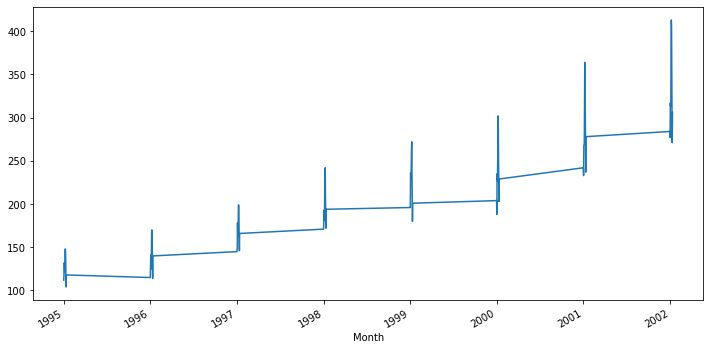

In [151]:
AR_df['Passengers'].plot(figsize=(12,6))
plt.show()

### Observation-
### 1) Trend is not constant.
### 2) Variance is also not constant

## Augmented Dickey Fuller Test (Checking Seasonality)
### Null Hypothesis (H0): The series is not stationary

### p-val > 0.05

### Alternate Hypothesis (H1): The series is stationary

### p-val <= 0.05

## Stationary Check Method

### Duckey Fuller Method

In [152]:
from scipy.stats.distributions import chi2
import statsmodels.tsa.stattools as sts

In [153]:
from statsmodels.tsa.stattools import adfuller

# H0= It's not stationary
# H1= It's stationary
def adf_test(AR_df):
    result = adfuller(AR_df.dropna())
    labels = ['ADF test statistic', 'p-value', '# lags used', '# observations']
    out= pd.Series(result[0:4], index=labels)     # (for key, val in result[4].items(): 
                                                                                      #out[f'critical value({key})']=val)
    if result[1] <=0.05:
        print('Reject the null hypothesis')
        print('Data is stationary')
    else:
        print('Fail to reject the null hypothesis')
        print('Data is non-stationary')

In [154]:
adf_test(AR_df['Passengers'])

Fail to reject the null hypothesis
Data is non-stationary


In [155]:
adf_test=adfuller(AR_df['Passengers'])
adf_test

(1.340247959646701,
 0.9968250481137263,
 12,
 83,
 {'1%': -3.5117123057187376,
  '5%': -2.8970475206326833,
  '10%': -2.5857126912469153},
 626.0084713813505)

In [156]:
# p-value (0.99) > critical value(0.05) .

# Failed to reject null hypothesis (The series is not stationary)

# Hence, the time series is Non-Stationary

## Converting Non-Stationary to Stationary Time Series Methods


### 1)Rolling Statistics
### 2)Transformation Method
### 3)Differencing

In [157]:
df1 = AR_df.copy()
df1.head()

,Passengers
Month,
1995-01-01,112
1995-01-02,118
1995-01-03,132
1995-01-04,129
1995-01-05,121


## Method 1

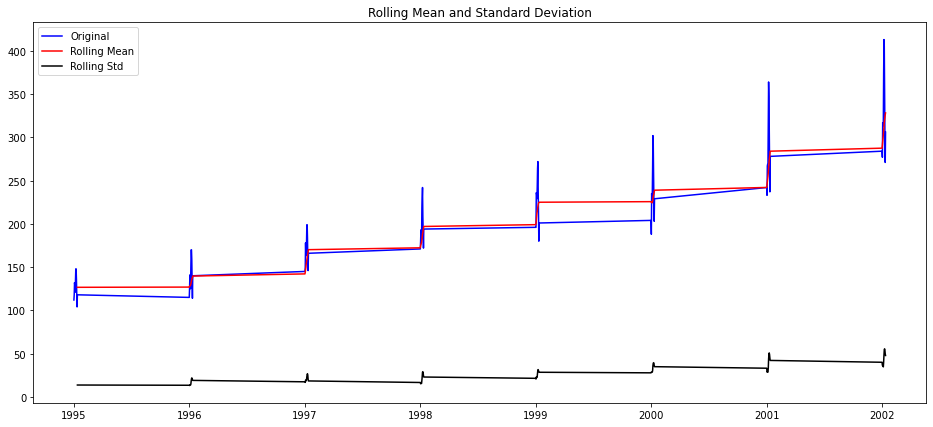

In [159]:
rollmean= df1.rolling(12).mean()
rollstd=df1.rolling(12).std()

plt.figure(figsize=(16,7))
fig1 = plt.figure(1)

orig = plt.plot(df1, color='blue', label='Original')
mean=plt.plot(rollmean, color ='red', label='Rolling Mean')
std= plt.plot(rollstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean and Standard Deviation')
plt.show(block=False)

## Observation
#### Rolling std is constant but Rolling Mean is not constant.

## Method 2

### Log Types

#### 1) adj_log
#### 2) adj_sqrt
#### 3) adj_cbrt

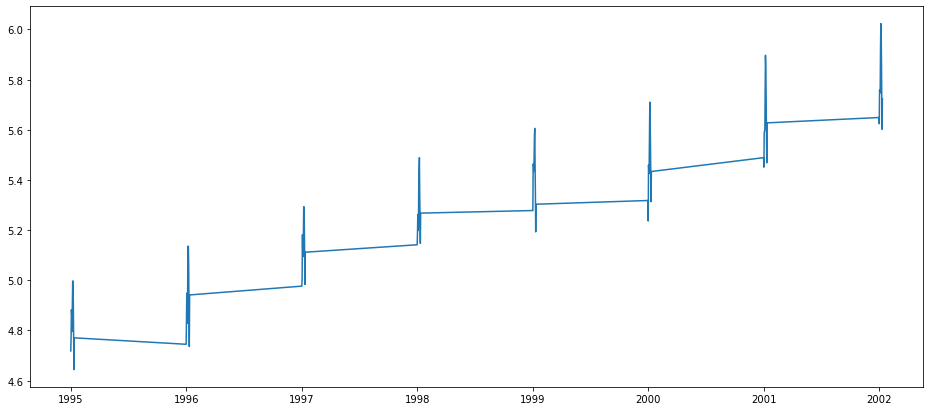

In [160]:
ts_log = np.log(df1)
plt.figure(figsize=(16,7))
fig= plt.figure(1)
plt.plot(ts_log)
plt.show()

## Still data is not stationary, now we will check for decompose seasonal

### Decomposition

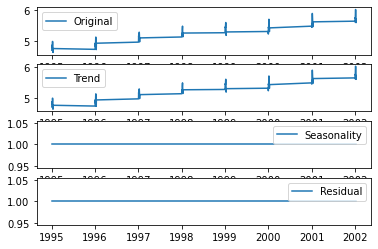

In [161]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(ts_log, freq=1, model='multiplicative')

trend= decomposition.trend
seasonal= decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label= 'Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residual')
plt.legend(loc='best')

### Observation-
#### Trend Compounds having more contribution in original data. After using log method it still data is Non-Stationary

## Method 3

In [163]:
#  y(t) = y(t) - y(t-1)

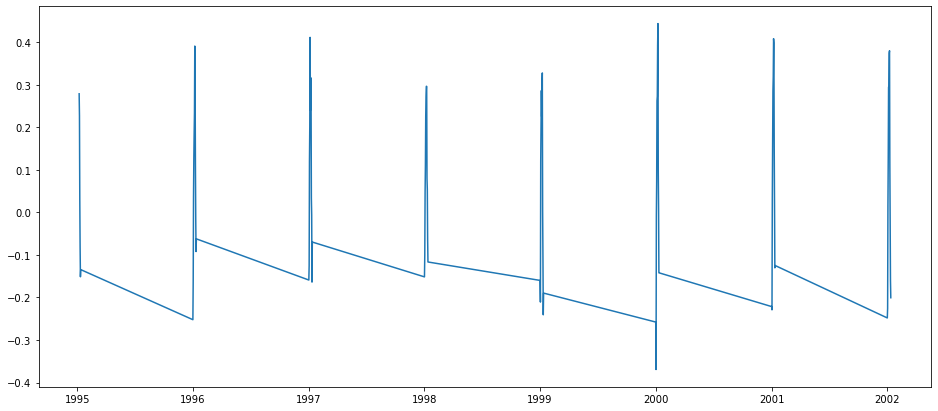

In [164]:
ts_log_diff = ts_log -ts_log.shift(6)
ts_log_diff1 = ts_log_diff.dropna()

plt.figure(figsize=(16,7))
fig= plt.figure(1)

plt.plot(ts_log_diff1)
plt.show()

In [167]:
def adfuller_test(Passengers):
    result = adfuller(Passengers)
    labels= ['ADF Test Statistic', 'p-value', '#Lags Used', 'Number of observations Used']
    for value, label in zip(result, labels):
        print(label+': '+ str(value))
    if result[1]<=0.05:
        print('Reject the null hypothesis')
        print('Data is stationary')
    else: 
        print('Fail to reject null hypothesis')
        print('Data is not stationary')

In [168]:
adfuller_test(ts_log_diff1)

ADF Test Statistic: -2.892158178395478
p-value: 0.046267523465163427
#Lags Used: 7
Number of observations Used: 82
Reject the null hypothesis
Data is stationary


## Observation-
#### I have used different methods for converting not Stationary to Stationary data,like Rolling Statistics, Differencing Method and Transformation Method, finally I have got stationary data after using Differencing method.
#### 1)We can see that there is no trend (upward or downward) above grap.
#### 2)It is a horizontal trend.
#### 3)The Mean and Variance is constant.

## LLR

In [169]:
def LLR_test(mod_1, mod_2, DF=1):
    L1=mod_1.fit().llf
    L2=mod_2.fit().llf
    LR = (2*(L2-L1))
    p = chi2.sf(LR, DF).round(3)
    return p

### ACF and PACF for Returns

In [170]:
import statsmodels.graphics.tsaplots as sgt

### Autocorrelation Function (ACF)

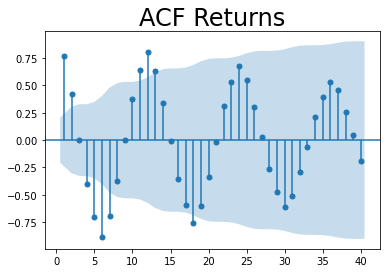

In [171]:
sgt.plot_acf(ts_log_diff1, lags=40, zero=False)
plt.title('ACF Returns', size=24)
plt.show()

### Observation
#### 1)The shaded portion is the less significant.
#### 2)With lag 1, the series is just correlated with itself. Hence, correlation=0.76 at lag=1.
#### 3)ACF captures both direct and indirect correlation with the lag time.
#### E.g.:- At lag=5, y(t) is directly correlated with y(t-5).
#### Also, y(t) is indirectly correlated with y(t-5) through y(t-4), y(t-3), y(t-2) and y(t-1).

### Partial Autocorrelation Function (PACF) 

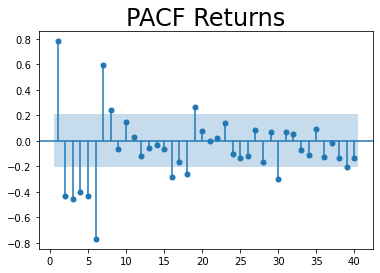

In [172]:
sgt.plot_pacf(ts_log_diff1, lags=40, zero=False, method=('ols'))
plt.title('PACF Returns', size=24)
plt.show()

### Observation-
#### 1)The shaded portion is the less significant.
#### 2)With lag 1, the series is just correlated with itself. Hence, correlation=0.8 at lag=1.
#### 3)PACF captures direct correlation with the lag time.

## AR for Returns (Lag Calculation)

In [173]:
from statsmodels.tsa.arima_model import ARMA

In [174]:
model_ar1 = ARMA(ts_log_diff1, order=(1,0))
results_ar1 = model_ar1.fit()
results_ar1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:             Passengers   No. Observations:                   90
Model:                     ARMA(1, 0)   Log Likelihood                  55.779
Method:                       css-mle   S.D. of innovations              0.130
Date:                Tue, 29 Jun 2021   AIC                           -105.559
Time:                        16:58:35   BIC                            -98.060
Sample:                             0   HQIC                          -102.535
                                                                              
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0648      0.060      1.079      0.281      -0.053       0.183
ar.L1.Passengers     0.7812      0.066     11.891      0.000       0.652       0.910
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.2801           +0.0000j            1.2801            0.0000
-----------------------------------------------------------------------------
"""

In [175]:
model_ar2= ARMA(ts_log_diff1, order=(2,0))
results_ar2= model_ar2.fit()
results_ar2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:             Passengers   No. Observations:                   90
Model:                     ARMA(2, 0)   Log Likelihood                  64.857
Method:                       css-mle   S.D. of innovations              0.117
Date:                Tue, 29 Jun 2021   AIC                           -121.714
Time:                        16:59:35   BIC                           -111.715
Sample:                             0   HQIC                          -117.682
                                                                              
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0665      0.039      1.720      0.085      -0.009       0.142
ar.L1.Passengers     1.1131      0.095     11.767      0.000       0.928       1.299
ar.L2.Passengers    -0.4288      0.095     -4.512      0.000      -0.615      -0.243
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.2980           -0.8046j            1.5272           -0.0883
AR.2            1.2980           +0.8046j            1.5272            0.0883
-----------------------------------------------------------------------------
"""

In [176]:
LLR_test(model_ar1, model_ar2)

0.0

In [177]:
model_ar3= ARMA(ts_log_diff1, order=(3,0))
results_ar3= model_ar3.fit()
print(results_ar3.summary())
print('LLR test: ' + str(LLR_test(model_ar2, model_ar3)))

                              ARMA Model Results                              
Dep. Variable:             Passengers   No. Observations:                   90
Model:                     ARMA(3, 0)   Log Likelihood                  75.083
Method:                       css-mle   S.D. of innovations              0.104
Date:                Tue, 29 Jun 2021   AIC                           -140.166
Time:                        17:01:44   BIC                           -127.667
Sample:                             0   HQIC                          -135.126
                                                                              
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0681      0.024      2.820      0.005       0.021       0.115
ar.L1.Passengers     0.9209      0.092      9.970      0.000       0.740       1.102
ar.L2.Passengers     0.0755 

In [178]:
model_ar4=ARMA(ts_log_diff1, order =(4,0))
results_ar4=model_ar4.fit()
print(results_ar4.summary())
print ("LLR test: " + str(LLR_test(model_ar3, model_ar4)))

                              ARMA Model Results                              
Dep. Variable:             Passengers   No. Observations:                   90
Model:                     ARMA(4, 0)   Log Likelihood                  82.772
Method:                       css-mle   S.D. of innovations              0.095
Date:                Tue, 29 Jun 2021   AIC                           -153.545
Time:                        17:02:31   BIC                           -138.546
Sample:                             0   HQIC                          -147.496
                                                                              
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0688      0.016      4.301      0.000       0.037       0.100
ar.L1.Passengers     0.7384      0.095      7.748      0.000       0.552       0.925
ar.L2.Passengers     0.1132 

In [179]:
model_ar5=ARMA(ts_log_diff1, order =(5,0))
results_ar5=model_ar5.fit()
print(results_ar5.summary())
print ("LLR test: " + str(LLR_test(model_ar4, model_ar5)))

                              ARMA Model Results                              
Dep. Variable:             Passengers   No. Observations:                   90
Model:                     ARMA(5, 0)   Log Likelihood                  91.173
Method:                       css-mle   S.D. of innovations              0.086
Date:                Tue, 29 Jun 2021   AIC                           -168.346
Time:                        17:02:45   BIC                           -150.847
Sample:                             0   HQIC                          -161.290
                                                                              
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0682      0.010      6.619      0.000       0.048       0.088
ar.L1.Passengers     0.5681      0.095      5.992      0.000       0.382       0.754
ar.L2.Passengers     0.0840 

In [180]:
model_ar6=ARMA(ts_log_diff1, order =(6,0))
results_ar6=model_ar6.fit()
print(results_ar6.summary())
print ("LLR test: " + str(LLR_test(model_ar5, model_ar6)))

                              ARMA Model Results                              
Dep. Variable:             Passengers   No. Observations:                   90
Model:                     ARMA(6, 0)   Log Likelihood                 120.493
Method:                       css-mle   S.D. of innovations              0.056
Date:                Tue, 29 Jun 2021   AIC                           -224.985
Time:                        17:02:59   BIC                           -204.987
Sample:                             0   HQIC                          -216.921
                                                                              
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0677      0.004     17.914      0.000       0.060       0.075
ar.L1.Passengers     0.2401        nan        nan        nan         nan         nan
ar.L2.Passengers     0.0150 

In [181]:
model_ar7=ARMA(ts_log_diff1, order =(7,0))
results_ar7=model_ar7.fit()
print(results_ar7.summary())
print ("LLR test: " + str(LLR_test(model_ar6, model_ar7)))

                              ARMA Model Results                              
Dep. Variable:             Passengers   No. Observations:                   90
Model:                     ARMA(7, 0)   Log Likelihood                 145.752
Method:                       css-mle   S.D. of innovations              0.045
Date:                Tue, 29 Jun 2021   AIC                           -273.505
Time:                        17:03:10   BIC                           -251.006
Sample:                             0   HQIC                          -264.432
                                                                              
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0661      0.008      8.519      0.000       0.051       0.081
ar.L1.Passengers     0.7091      0.085      8.325      0.000       0.542       0.876
ar.L2.Passengers     0.0030 

In [182]:
model_ar8=ARMA(ts_log_diff1, order =(8,0))
results_ar8=model_ar8.fit()
print(results_ar8.summary())
print ("LLR test: " + str(LLR_test(model_ar7, model_ar8)))

                              ARMA Model Results                              
Dep. Variable:             Passengers   No. Observations:                   90
Model:                     ARMA(8, 0)   Log Likelihood                 148.124
Method:                       css-mle   S.D. of innovations              0.044
Date:                Tue, 29 Jun 2021   AIC                           -276.247
Time:                        17:03:25   BIC                           -251.249
Sample:                             0   HQIC                          -266.166
                                                                              
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0651      0.010      6.662      0.000       0.046       0.084
ar.L1.Passengers     0.5679      0.104      5.455      0.000       0.364       0.772
ar.L2.Passengers     0.2164 

### Observation
#### P values very high moving to Model7  to Model8, there is no model improvments. 
#### Model 7 is good values for P.

## Analysing Residuals

In [183]:
ts_log_diff1['res_ret']=results_ar6.resid

In [184]:
ts_log_diff1.res_ret.mean()

0.0019056482945154847

In [185]:
ts_log_diff1.res_ret.var()

0.0037506031881007935

In [186]:
sts.adfuller(ts_log_diff1.res_ret)

(-4.417103942312867,
 0.0002768133885095413,
 1,
 88,
 {'1%': -3.506944401824286,
  '5%': -2.894989819214876,
  '10%': -2.584614550619835},
 -243.4388870075258)

## ACF of Residuals for Returns

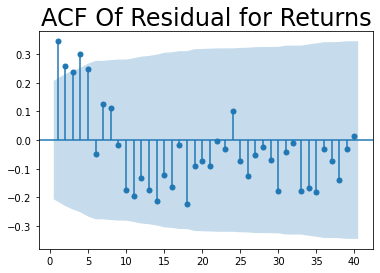

In [187]:
sgt.plot_acf(ts_log_diff1.res_ret, zero=False, lags=40)
plt.title('ACF Of Residual for Returns', size=24)
plt.show()

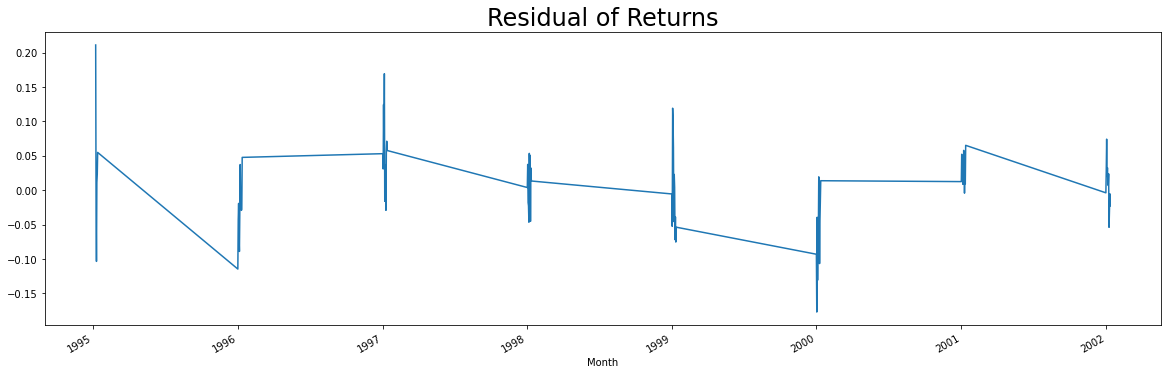

In [188]:
ts_log_diff1.res_ret.plot(figsize=(20,6))
plt.title('Residual of Returns', size = 24)
plt.show()

## Building the Auto Regressive Model (AR)

In [189]:
from statsmodels.tsa.arima_model import ARIMA

In [190]:
len(ts_log_diff1)

90

In [191]:
train_len1 = 78

In [192]:
train_AR1 = ts_log_diff1.iloc[:78]
test_AR1 = ts_log_diff1.iloc[78:]

In [193]:
model_ARIMA = ARIMA(train_AR1['Passengers'], order=(6,0,0))
results_ARIMA = model_ARIMA.fit()
results_ARIMA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:             Passengers   No. Observations:                   78
Model:                     ARMA(6, 0)   Log Likelihood                 106.190
Method:                       css-mle   S.D. of innovations              0.059
Date:                Tue, 29 Jun 2021   AIC                           -196.381
Time:                        17:10:44   BIC                           -177.527
Sample:                             0   HQIC                          -188.833
                                                                              
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0671      0.005     14.874      0.000       0.058       0.076
ar.L1.Passengers     0.2610      0.075      3.502      0.000       0.115       0.407
ar.L2.Passengers     0.0264      0.079      0.336      0.737      -0.128       0.180
ar.L3.Passengers    -0.0664      0.082     -0.812      0.417      -0.227       0.094
ar.L4.Passengers    -0.0155      0.078     -0.198      0.843      -0.169       0.138
ar.L5.Passengers    -0.0066      0.079     -0.083      0.934      -0.162       0.149
ar.L6.Passengers    -0.7328      0.072    -10.241      0.000      -0.873      -0.593
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.8767           -0.4893j            1.0040           -0.0810
AR.2            0.8767           +0.4893j            1.0040            0.0810
AR.3            0.0597           -1.0657j            1.0673           -0.2411
AR.4            0.0597           +1.0657j            1.0673            0.2411
AR.5           -0.9408           -0.5507j            1.0902           -0.4157
AR.6           -0.9408           +0.5507j            1.0902            0.4157
-----------------------------------------------------------------------------
"""

In [194]:
model_ARIMA1 = model_ARIMA.fit()
model_ARIMA1.params

const               0.067082
ar.L1.Passengers    0.260953
ar.L2.Passengers    0.026355
ar.L3.Passengers   -0.066398
ar.L4.Passengers   -0.015534
ar.L5.Passengers   -0.006599
ar.L6.Passengers   -0.732794
dtype: float64

### Observation-
#### constant = 0.067082 . Because we saw in the Stationary time series that the mean was almost close to zero.
#### Coefficient =-0.732771
#### The AR model has only one lag or p=6. Hence, we can represent the model as AR(6)

## Use Model to Predict_AR Model

In [213]:
start = len(train_AR1)
end = len(ts_log_diff1) - 1
predictions_ar = results.predict(start=start, end=end, dynamic=False, typ='levels')
predictions_ar = predictions_ar.rename('ARIMA(6,0,0) Predictions')

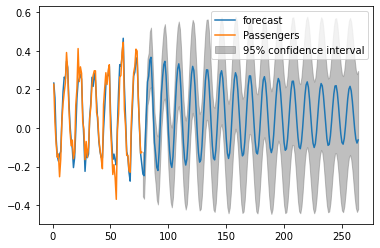

In [214]:
results_ARIMA.plot_predict(1,264)        # predicting for 10 years/120 months. 144+12 = 264
x = results_ARIMA.forecast(steps=120)

In [215]:
model1=ARIMA(AP_df['Passengers'], order=(6,0,0))
results=model1.fit()
fcast_ar=results.predict(len(AP_df), len(AP_df)+11, typ='levels').rename('ARIMA(6,0,0) Forecast')

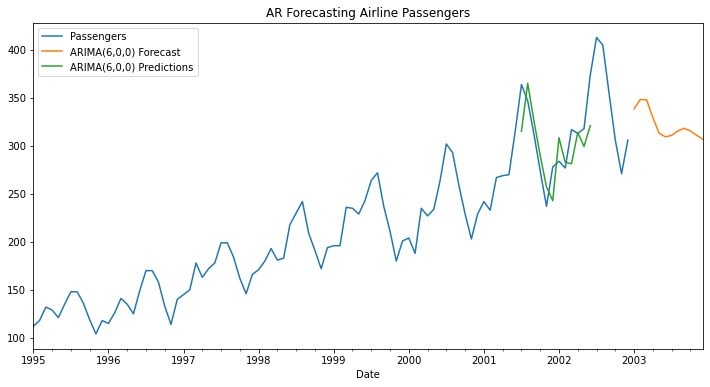

In [216]:
title = 'AR Forecasting Airline Passengers'
ylabel= 'Passengers'
xlabel= 'Period'

AP_df['Passengers'].plot(legend=True, figsize=(12,6), title=title)
fcast_ar.plot(legend=True)
predictions_ar.plot(legend=True)
plt.show()

In [217]:
for i in range(len(predictions_ar)):
    print(f"predicted={predictions_ar[i]:<11.10}, expected={test_AR1['Passengers'][i]}")

predicted=315.2832945, expected=-0.2481796294755343
predicted=365.2133417, expected=-0.22530727375952075
predicted=325.9038749, expected=0.015898586067797815
predicted=289.8410205, expected=0.13307508415208247
predicted=257.3424047, expected=0.2939912416450454
predicted=242.9085205, expected=0.29663468372389534
predicted=308.508111 , expected=0.3744733547998269
predicted=282.8831118, expected=0.3798695609192002
predicted=281.4290819, expected=0.11321601559813566
predicted=313.990699 , expected=-0.022618088587772256
predicted=299.4334244, expected=-0.1599325619004759
predicted=321.0475072, expected=-0.20067069546215155


## 12 Months Forecast  

In [218]:
fcast_ar

2003-01-01    338.508296
2003-02-01    348.388140
2003-03-01    347.998884
2003-04-01    329.461236
2003-05-01    313.149843
2003-06-01    309.480165
2003-07-01    310.927185
2003-08-01    315.651182
2003-09-01    318.283222
2003-10-01    315.595949
2003-11-01    311.062352
2003-12-01    306.731681
Freq: MS, Name: ARIMA(6,0,0) Forecast, dtype: float64

## MSE and RMSE (AR Model)

In [219]:
AR = AP_df.copy()

In [220]:
Train_ar1 = AR.head(84)
Test_ar1 = AR.tail(12)

In [221]:
mse_ar = mean_squared_error(Test_ar1.Passengers, fcast_ar)
mse_ar.round(2)

2911.12

In [222]:
rmse_ar= np.sqrt(mean_squared_error(Test_ar1.Passengers, fcast_ar)).round(2)
rmse_ar

53.95

In [223]:
AR = {'MODEL': pd.Series(['AR_Model']), 'RMSE': pd.Series([rmse_ar]), 'MSE': pd.Series([mse_ar])}
AR = pd.DataFrame(AR)
AR.round(2)

,MODEL,RMSE,MSE
0,AR_Model,53.95,2911.12


## MA for Returns (Lag Calculation)

In [224]:
model_ma1 = ARMA(ts_log_diff1['Passengers'], order=(0,1))    
results_ma1 = model_ma1.fit()
results_ma1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:             Passengers   No. Observations:                   90
Model:                     ARMA(0, 1)   Log Likelihood                  51.301
Method:                       css-mle   S.D. of innovations              0.134
Date:                Tue, 29 Jun 2021   AIC                            -96.601
Time:                        18:33:36   BIC                            -89.102
Sample:                             0   HQIC                           -93.577
                                                                              
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0667      0.028      2.387      0.017       0.012       0.121
ma.L1.Passengers     0.9867      0.064     15.482      0.000       0.862       1.112
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -1.0135           +0.0000j            1.0135            0.5000
-----------------------------------------------------------------------------
"""

In [225]:
model_ma2=ARMA(ts_log_diff1['Passengers'], order =(0,2))
results_ma2=model_ma2.fit()
results_ma2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:             Passengers   No. Observations:                   90
Model:                     ARMA(0, 2)   Log Likelihood                  73.160
Method:                       css-mle   S.D. of innovations              0.103
Date:                Tue, 29 Jun 2021   AIC                           -138.321
Time:                        18:33:51   BIC                           -128.321
Sample:                             0   HQIC                          -134.288
                                                                              
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0644      0.032      2.018      0.044       0.002       0.127
ma.L1.Passengers     0.9792      0.109      9.018      0.000       0.766       1.192
ma.L2.Passengers     0.9998      0.204      4.894      0.000       0.599       1.400
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -0.4897           -0.8720j            1.0001           -0.3314
MA.2           -0.4897           +0.8720j            1.0001            0.3314
-----------------------------------------------------------------------------
"""

In [226]:
LLR_test(model_ma1, model_ma2)

0.0

In [227]:
model_ma3=ARMA(ts_log_diff1['Passengers'], order =(0,3))
results_ma3=model_ma3.fit()
print(results_ma3.summary())
print ("LLR test: " + str(LLR_test(model_ma2, model_ma3)))

                              ARMA Model Results                              
Dep. Variable:             Passengers   No. Observations:                   90
Model:                     ARMA(0, 3)   Log Likelihood                  75.453
Method:                       css-mle   S.D. of innovations              0.101
Date:                Tue, 29 Jun 2021   AIC                           -140.906
Time:                        18:34:14   BIC                           -128.407
Sample:                             0   HQIC                          -135.865
                                                                              
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0630      0.038      1.664      0.096      -0.011       0.137
ma.L1.Passengers     1.1593      0.107     10.866      0.000       0.950       1.368
ma.L2.Passengers     1.1887 

In [228]:
model_ma4=ARMA(ts_log_diff1['Passengers'], order =(0,4))
results_ma4=model_ma4.fit()
print(results_ma4.summary())
print ("LLR test: " + str(LLR_test(model_ma3, model_ma4)))

                              ARMA Model Results                              
Dep. Variable:             Passengers   No. Observations:                   90
Model:                     ARMA(0, 4)   Log Likelihood                  78.335
Method:                       css-mle   S.D. of innovations              0.097
Date:                Tue, 29 Jun 2021   AIC                           -144.670
Time:                        18:34:24   BIC                           -129.671
Sample:                             0   HQIC                          -138.621
                                                                              
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0652      0.034      1.899      0.058      -0.002       0.133
ma.L1.Passengers     1.4165      0.121     11.736      0.000       1.180       1.653
ma.L2.Passengers     1.0579 

### Observation
#### q values very high moving to Model3  to Model4, there is no model improvments. 

#### Model 4 is good values for q.

## Analysing Residuals

In [229]:
ts_log_diff1['res_ret']=results_ar4.resid

In [230]:
ts_log_diff1.res_ret.mean()

0.00042766179984489233

In [231]:
ts_log_diff1.res_ret.var()

0.009578018970698257

In [232]:
sts.adfuller(ts_log_diff1.res_ret)

(-2.2857019385696025,
 0.1766208547284948,
 10,
 79,
 {'1%': -3.5159766913976376,
  '5%': -2.898885703483903,
  '10%': -2.5866935058484217},
 -231.6127881575975)

## ACF of Residuals

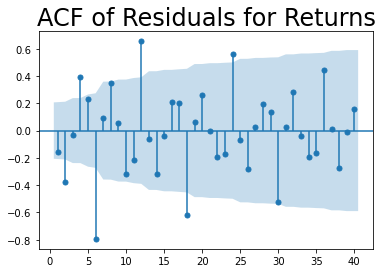

In [233]:
sgt.plot_acf(ts_log_diff1.res_ret, zero=False, lags=40)
plt.title('ACF of Residuals for Returns', size=24)
plt.show()

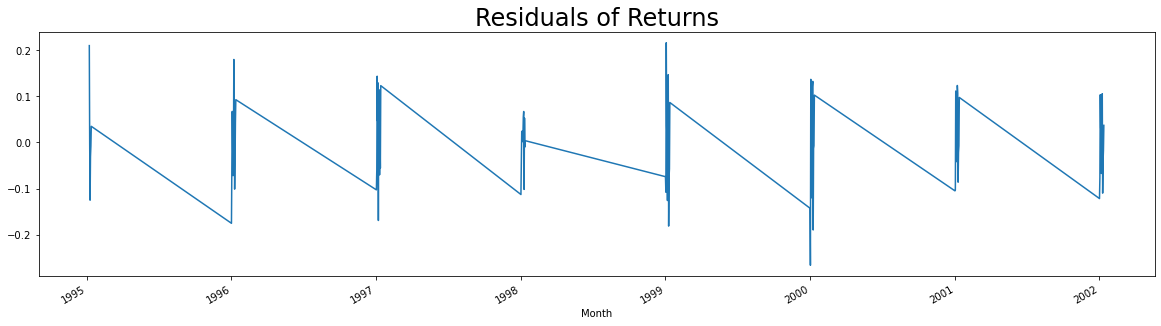

In [234]:
ts_log_diff1.res_ret.plot(figsize=(20,5))
plt.title("Residuals of Returns", size=24)
plt.show()

## Building the Moving Average (MA) Model
### q parameter = 4 MA(4) model
### p = 0 and d = 0 As we are not considering these two parameters in this model.

In [235]:
train_MA=ts_log_diff1.iloc[:78]
test_MA=ts_log_diff1.iloc[78:]

In [236]:
model = ARIMA(train_MA['Passengers'],order=(0,0,4))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:             Passengers   No. Observations:                   78
Model:                     ARMA(0, 4)   Log Likelihood                  66.471
Method:                       css-mle   S.D. of innovations              0.097
Date:                Tue, 29 Jun 2021   AIC                           -120.942
Time:                        18:38:32   BIC                           -106.802
Sample:                             0   HQIC                          -115.282
                                                                              
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0657      0.035      1.891      0.059      -0.002       0.134
ma.L1.Passengers     1.4154      0.332      4.269      0.000       0.766       2.065
ma.L2.Passengers     1.0416      0.140      7.447      0.000       0.767       1.316
ma.L3.Passengers     0.1877      0.279      0.674      0.501      -0.359       0.734
ma.L4.Passengers    -0.4379      0.165     -2.656      0.008      -0.761      -0.115
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -1.0003           -0.0000j            1.0003           -0.5000
MA.2           -0.4269           -0.9043j            1.0000           -0.3202
MA.3           -0.4269           +0.9043j            1.0000            0.3202
MA.4            2.2828           -0.0000j            2.2828           -0.0000
-----------------------------------------------------------------------------
"""

In [237]:
model_fit = model.fit()
model_fit.params

const               0.065724
ma.L1.Passengers    1.415410
ma.L2.Passengers    1.041584
ma.L3.Passengers    0.187743
ma.L4.Passengers   -0.437925
dtype: float64

### Observation-
#### constant = 0.065718 . Because we saw in the Stationary time series that the mean was almost close to zero.
#### Coefficient =-0.437957
#### The MA model has only one lag or p=2. Hence, we can represent the model as AR(2)
#### Converting Non-Stationary to Stationary Time Series

## Use Model to Predict

In [247]:
start = len(train_MA)
end = len(ts_log_diff1) - 1
predictions_ar1 = results.predict(start=start, end=end, dynamic=False, typ='levels')
predictions_ar1=predictions_ar1.rename('ARIMA(0,0,4) Predictions')

In [249]:
model=ARIMA(AP_df['Passengers'], order=(0,0,4))
results=model.fit(disp=-1)
fcast_ma=results.predict(len(AP_df), len(AP_df)+11, typ='levels').rename('ARIMA(0,0,4) Forecast')

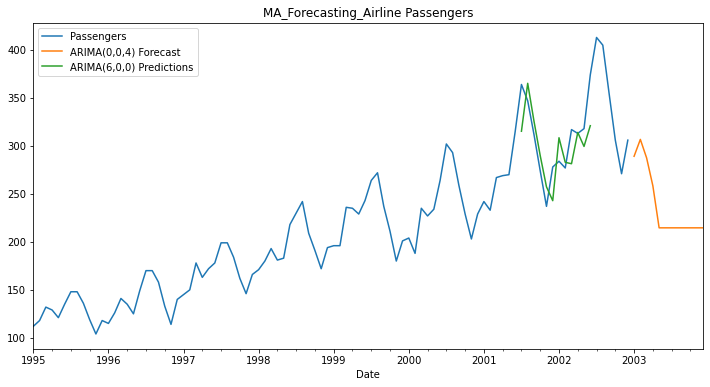

In [253]:
title = 'MA_Forecasting_Airline Passengers'
ylabel='Passengers'
xlabel='Period' 

AP_df['Passengers'].plot(legend=True,figsize=(12,6),title=title)
fcast_ma.plot(legend=True)
predictions_ar.plot(legend=True)
plt.show()

In [255]:
fcast_ma            #12 Month Forecast

2003-01-01    289.183651
2003-02-01    306.762878
2003-03-01    287.500906
2003-04-01    258.401919
2003-05-01    214.615847
2003-06-01    214.615847
2003-07-01    214.615847
2003-08-01    214.615847
2003-09-01    214.615847
2003-10-01    214.615847
2003-11-01    214.615847
2003-12-01    214.615847
Freq: MS, Name: ARIMA(0,0,4) Forecast, dtype: float64

## MSE and RMSE Model

In [256]:
MA = AP_df.copy()

In [257]:
Train_ma = MA.head(84)
Test_ma = MA.tail(12)

In [258]:
mse_ma = mean_squared_error(Test_ma.Passengers, fcast_ma)
mse_ma.round(2)

13003.9

In [263]:
rsme_ma = np.sqrt(mean_squared_error(Test_ma.Passengers, fcast_ma)).round(2)
rsme_ma

114.03

In [265]:
MA = {"MODEL":pd.Series(["AR_Model"]),"RMSE":pd.Series([rsme_ma]),"MSE":pd.Series([mse_ma])}
MA=pd.DataFrame(MA)
MA.round(2)

,MODEL,RMSE,MSE
0,AR_Model,114.03,13003.9


## Autoregressive Integrated Moving Averages (ARIMA)
#### Recall that an AR(1) model follows the formula

 #### 𝑦𝑡=𝑐+𝜙1𝑦𝑡−1+𝜀𝑡 
#### while an MA(1) model follows the formula

 #### 𝑦𝑡=𝜇+𝜃1𝜀𝑡−1+𝜀𝑡 
#### where 𝑐 is a constant, 𝜇 is the expectation of 𝑦𝑡 (often assumed to be zero), 𝜙1 is the AR lag coefficient, 𝜃1 (theta-sub-one) is the MA lag coefficient, and 𝜀 (epsilon) is white noise.

#### An ARMA(1,1) model therefore follows

#### 𝑦𝑡=𝑐+𝜙1𝑦𝑡−1+𝜃1𝜀𝑡−1+𝜀𝑡

In [266]:
#from pmdarima import auto_arima # for determining ARIMA orders
#stepwise_fit = auto_arima(df['Passengers'], start_p=0, start_q=0,
                          #max_p=6, max_q=4, m=12,
                          #seasonal=False,
                          #d=None, trace=True,
                          #error_action='ignore',   # we don't want to know if an order does not work
                          #suppress_warnings=True,  # we don't want convergence warnings
                          #stepwise=True)           # set to stepwise

#stepwise_fit.summary()

## Building ARIMA Model

In [267]:
train_arima = ts_log_diff1.iloc[:78]
test_arima = ts_log_diff1.iloc[78:]

In [268]:
modelAR = ARIMA(train_arima['Passengers'], order=(6,1,4))
resultsAR = modelAR.fit()
resultsAR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:           D.Passengers   No. Observations:                   77
Model:                 ARIMA(6, 1, 4)   Log Likelihood                 110.663
Method:                       css-mle   S.D. of innovations              0.046
Date:                Tue, 29 Jun 2021   AIC                           -197.326
Time:                        19:06:52   BIC                           -169.200
Sample:                             1   HQIC                          -186.076
                                                                              
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0011        nan        nan        nan         nan         nan
ar.L1.D.Passengers     0.0741        nan        nan        nan         nan         nan
ar.L2.D.Passengers     0.0008        nan        nan        nan         nan         nan
ar.L3.D.Passengers     0.0125   2.43e-07   5.12e+04      0.000       0.012       0.012
ar.L4.D.Passengers    -0.0414        nan        nan        nan         nan         nan
ar.L5.D.Passengers    -0.0138        nan        nan        nan         nan         nan
ar.L6.D.Passengers    -0.9030        nan        nan        nan         nan         nan
ma.L1.D.Passengers    -0.4253      0.123     -3.471      0.001      -0.665      -0.185
ma.L2.D.Passengers     0.0727      0.120      0.608      0.543      -0.162       0.307
ma.L3.D.Passengers    -0.2920      0.121     -2.420      0.016      -0.528      -0.056
ma.L4.D.Passengers     0.2084      0.130      1.603      0.109      -0.046       0.463
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.8667           -0.4988j            1.0000           -0.0831
AR.2            0.8667           +0.4988j            1.0000            0.0831
AR.3           -0.8822           -0.5249j            1.0266           -0.4146
AR.4           -0.8822           +0.5249j            1.0266            0.4146
AR.5            0.0079           -1.0251j            1.0251           -0.2488
AR.6            0.0079           +1.0251j            1.0251            0.2488
MA.1           -0.7163           -1.2023j            1.3995           -0.3355
MA.2           -0.7163           +1.2023j            1.3995            0.3355
MA.3            1.4168           -0.6652j            1.5651           -0.0699
MA.4            1.4168           +0.6652j            1.5651            0.0699
-----------------------------------------------------------------------------
"""

In [269]:
modelfit = modelAR.fit()
modelfit.params

const                 0.001134
ar.L1.D.Passengers    0.074064
ar.L2.D.Passengers    0.000834
ar.L3.D.Passengers    0.012462
ar.L4.D.Passengers   -0.041360
ar.L5.D.Passengers   -0.013814
ar.L6.D.Passengers   -0.902963
ma.L1.D.Passengers   -0.425266
ma.L2.D.Passengers    0.072738
ma.L3.D.Passengers   -0.292003
ma.L4.D.Passengers    0.208430
dtype: float64

### Observation-
#### constant = 0.001134 . Because we saw in the Stationary time series that the mean was almost close to zero.
#### Coefficient = AR=-0.902963 and MA=0.208429
#### The ARIMA model has e lag or 6-1-4. Hence, we can represent the model as ARIMA(6-1-4) 

In [270]:
start=len(train_arima)
end=len(ts_log_diff1)-1
predictions=results.predict(start=start, end=end, dynamic=False, typ='levels')
predictions=predictions.rename('ARIMA(6,1,4) Predictions')

In [271]:
for i in range(len(predictions)):
    print(f"predicted={predictions[i]:<11.10}, expected={test_arima['Passengers'][i]}")

predicted=341.1997438, expected=-0.2481796294755343
predicted=341.0117674, expected=-0.22530727375952075
predicted=315.6178113, expected=0.015898586067797815
predicted=294.3072521, expected=0.13307508415208247
predicted=212.0365239, expected=0.2939912416450454
predicted=219.1265153, expected=0.29663468372389534
predicted=291.0019714, expected=0.3744733547998269
predicted=287.8246156, expected=0.3798695609192002
predicted=271.3846721, expected=0.11321601559813566
predicted=296.7759966, expected=-0.022618088587772256
predicted=274.5677173, expected=-0.1599325619004759
predicted=319.6105474, expected=-0.20067069546215155


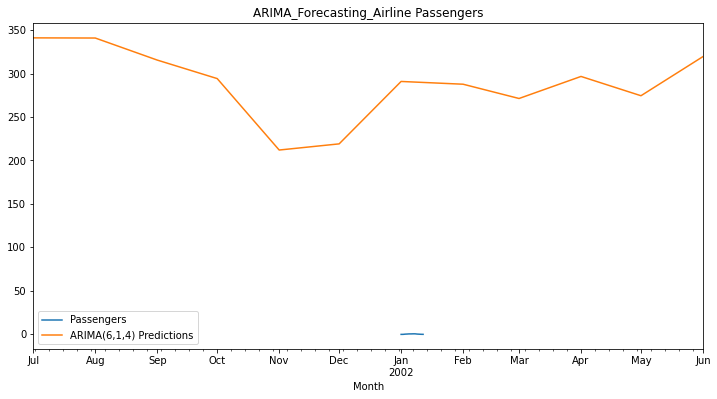

In [272]:
title = 'ARIMA_Forecasting_Airline Passengers'
ylabel='Passengers'
xlabel='' 

test_arima['Passengers'].plot(legend=True,figsize=(12,6),title=title)
predictions.plot(legend=True)
plt.show()

In [273]:
model=ARIMA(AP_df['Passengers'], order=(6,1,4))
results=model.fit(disp=-1)
fcast_ARIMA=results.predict(len(AP_df), len(AP_df)+11, typ='levels').rename('ARIMA(6,1,4) Forecast')

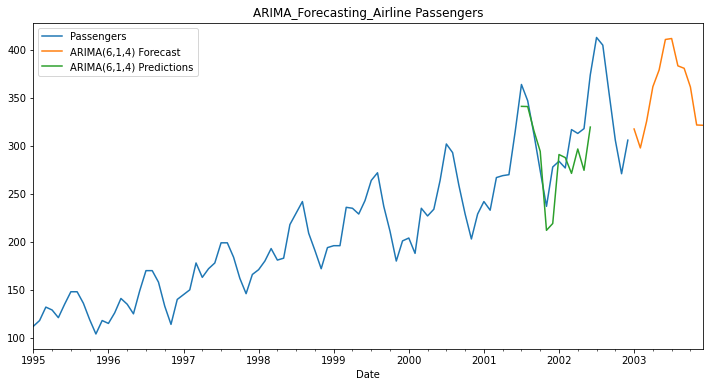

In [274]:
title = 'ARIMA_Forecasting_Airline Passengers'
ylabel='Passengers'
xlabel='Period' 

AP_df['Passengers'].plot(legend=True,figsize=(12,6),title=title)
fcast_ARIMA.plot(legend=True)
predictions.plot(legend=True)
plt.show()

In [275]:
fcast_ARIMA

2003-01-01    317.631281
2003-02-01    297.858776
2003-03-01    325.573291
2003-04-01    361.670331
2003-05-01    379.109207
2003-06-01    410.891021
2003-07-01    411.907443
2003-08-01    383.407759
2003-09-01    380.882517
2003-10-01    361.379003
2003-11-01    321.793312
2003-12-01    321.482035
Freq: MS, Name: ARIMA(6,1,4) Forecast, dtype: float64

## Evaluate Model

In [297]:
AR_df.head()

,Passengers
Month,
1995-01-01,112
1995-01-02,118
1995-01-03,132
1995-01-04,129
1995-01-05,121


In [298]:
ARIMA = AR_df.copy()

In [299]:
Train_arima1 = ARIMA.head(84)
Test_arima1 = ARIMA.tail(12)

In [300]:
mse_arima = mean_squared_error(Test_arima1, fcast_ARIMA)
mse_arima.round(2)

1343.96

In [301]:
rmse_arima= np.sqrt(mean_squared_error(Test_arima1.Passengers, fcast_ARIMA)).round(2)
rmse_arima

36.66

In [302]:
ARIMA={"MODEL":pd.Series(["ARIMA_Model"]),"RMSE":pd.Series([rmse_arima]),"MSE":pd.Series([mse_arima])}
ARIMA=pd.DataFrame(ARIMA)
ARIMA.round(2)

,MODEL,RMSE,MSE
0,ARIMA_Model,36.66,1343.96


## Seasonal Auto Regressive Integrated Moving Average

In [303]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [304]:
AR_df.head()

,Passengers
Month,
1995-01-01,112
1995-01-02,118
1995-01-03,132
1995-01-04,129
1995-01-05,121


In [305]:
train_SM = AR_df.head(84)
test_SM = AR_df.tail(12)

In [306]:
model_SM = SARIMAX(train_SM['Passengers'], order=(6,1,4), seasonal_order=(6,1,4,12))
results_SM = model_SM.fit()
results_SM.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                         Passengers   No. Observations:                   84
Model:             SARIMAX(6, 1, 4)x(6, 1, 4, 12)   Log Likelihood                -254.281
Date:                            Wed, 30 Jun 2021   AIC                            550.563
Time:                                    11:38:01   BIC                            598.079
Sample:                                         0   HQIC                           569.459
                                             - 84                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0890     13.766      0.006      0.995     -26.891      27.069
ar.L2         -0.3049      8.756     -0.035      0.972     -17.466      16.856
ar.L3          0.5622     11.010      0.051      0.959     -21.017      22.142
ar.L4         -0.0429      1.620     -0.026      0.979      -3.219       3.133
ar.L5         -0.0109      2.135     -0.005      0.996      -4.195       4.174
ar.L6          0.1147      1.945      0.059      0.953      -3.697       3.926
ma.L1         -0.3604     13.906     -0.026      0.979     -27.616      26.895
ma.L2          0.4193      5.183      0.081      0.936      -9.739      10.578
ma.L3         -0.8739      9.675     -0.090      0.928     -19.836      18.089
ma.L4          0.1830      4.244      0.043      0.966      -8.135       8.500
ar.S.L12      -0.3902     44.994     -0.009      0.993     -88.576      87.796
ar.S.L24       0.0110     13.019      0.001      0.999     -25.506      25.528
ar.S.L36       0.0467      6.222      0.008      0.994     -12.149      12.242
ar.S.L48      -0.1056      4.880     -0.022      0.983      -9.670       9.459
ar.S.L60       0.8453      5.556      0.152      0.879     -10.045      11.736
ar.S.L72       0.5664     41.701      0.014      0.989     -81.165      82.298
ma.S.L12      -0.5559     57.930     -0.010      0.992    -114.096     112.984
ma.S.L24       0.1782     90.618      0.002      0.998    -177.430     177.787
ma.S.L36      -0.2157     76.816     -0.003      0.998    -150.772     150.340
ma.S.L48       0.4009    112.151      0.004      0.997    -219.410     220.212
sigma2         6.9456    593.803      0.012      0.991   -1156.887    1170.779
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 2.27
Prob(Q):                              0.89   Prob(JB):                         0.32
Heteroskedasticity (H):               2.45   Skew:                             0.43
Prob(H) (two-sided):                  0.03   Kurtosis:                         2.85
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [307]:
model_fit1 = model_SM.fit()
model_fit1.params

ar.L1       0.089004
ar.L2      -0.304931
ar.L3       0.562165
ar.L4      -0.042890
ar.L5      -0.010885
ar.L6       0.114702
ma.L1      -0.360429
ma.L2       0.419324
ma.L3      -0.873888
ma.L4       0.182973
ar.S.L12   -0.390213
ar.S.L24    0.011030
ar.S.L36    0.046697
ar.S.L48   -0.105561
ar.S.L60    0.845268
ar.S.L72    0.566436
ma.S.L12   -0.555910
ma.S.L24    0.178164
ma.S.L36   -0.215742
ma.S.L48    0.400863
sigma2      6.945612
dtype: float64

In [308]:
start=len(train_SM)
end=len(AR_df)-1
predictions1=results.predict(start=start, end=end, dynamic=False, typ='levels')
predictions1=predictions1.rename('SARIMA(6,1,4) Predictions')

In [309]:
for i in range(len(predictions1)):
    print(f"predicted={predictions1[i]:<11.10}, expected={test_SM['Passengers'][i]}")

predicted=283.3089168, expected=284
predicted=257.5973367, expected=277
predicted=314.7070048, expected=317
predicted=340.767756 , expected=313
predicted=312.2656625, expected=318
predicted=367.8781604, expected=374
predicted=387.24537  , expected=413
predicted=388.4133135, expected=405
predicted=386.5369929, expected=355
predicted=307.1732487, expected=306
predicted=280.6389809, expected=271
predicted=291.1641362, expected=306


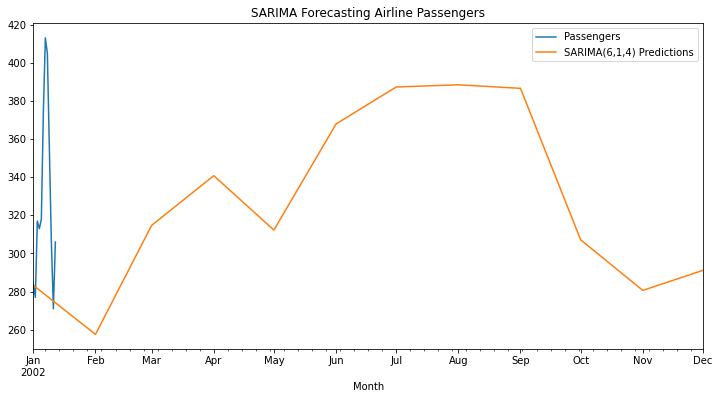

In [310]:
title = 'SARIMA Forecasting Airline Passengers'
ylabel='Passengers'
xlabel='' 

test_SM['Passengers'].plot(legend=True,figsize=(12,6),title=title)
predictions1.plot(legend=True)
plt.show()

In [311]:
model2=SARIMAX(AR_df['Passengers'], order=(6,1,4))
results=model2.fit()
fcast_SARIMA=results.predict(len(AR_df), len(AR_df)+11, typ='levels').rename('SARIMA(6,1,4) Forecast')

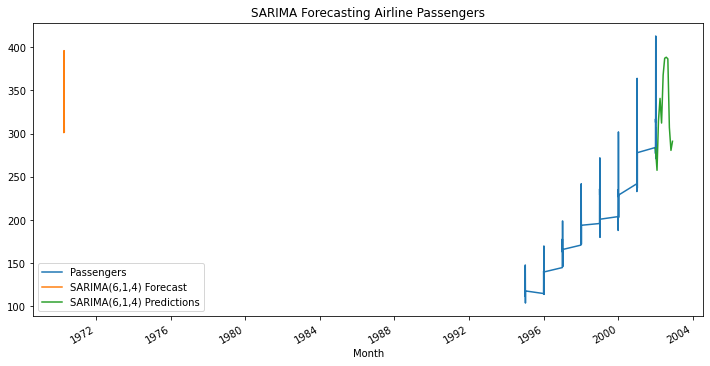

In [312]:
title = 'SARIMA Forecasting Airline Passengers'
ylabel='Passengers'
xlabel='Period' 

AR_df['Passengers'].plot(legend=True,figsize=(12,6),title=title)
fcast_SARIMA.plot(legend=True)
predictions1.plot(legend=True)
plt.show()

In [313]:
fcast_SARIMA

96     316.404539
97     301.142436
98     321.539160
99     348.672184
100    367.185490
101    395.385999
102    396.064301
103    373.372026
104    365.326101
105    342.850215
106    308.691820
107    302.439468
Name: SARIMA(6,1,4) Forecast, dtype: float64

In [314]:
mse_sm=mean_squared_error(test_SM.Passengers, fcast_SARIMA)
mse_sm.round(2)

832.3

In [315]:
rmse_sm=np.sqrt(mean_squared_error(test_SM.Passengers, fcast_SARIMA)).round(2)
rmse_sm

28.85

In [316]:
SARIMA={"MODEL":pd.Series(["SARIMA_Model"]),"RMSE":pd.Series([rmse_sm]),"MSE":pd.Series([mse_sm])}
SARIMA=pd.DataFrame(SARIMA)
SARIMA.round(2)

,MODEL,RMSE,MSE
0,SARIMA_Model,28.85,832.3


In [320]:
Results={"MODEL":pd.Series(["Naive","Simple Moving Average","Exponentially Weighted Moving Average","Single Exponeatail Smoothing","Double Exponential Smoothing","Holt Winters Method_Additive","Holt Winters Method_Multiplicative","Auto Regressive (AR)","Moving average (MA)","ARIMA",'SARIMA']),"RMSE":pd.Series([rmse_Naive,rmse_ap,rmse_ewma,rmse_ses,rmse_des,rmse_hwm_add,rmse_hwm_mul,rmse_ar,rsme_ma,rmse_arima,rmse_sm])} #"MSE":pd.Series([mse_naive,mse_ap_ma,mse_ewma,mse_ses,mse_des,mse_hwm_add,mse_hwm_mul,mse_ar,mse_ma,mse_arima,mse_sm])}
Results=pd.DataFrame(Results)
Results.round(2)

,MODEL,RMSE
0,Naive,68.01
1,Simple Moving Average,68.01
2,Exponentially Weighted Moving Average,68.01
3,Single Exponeatail Smoothing,64.84
4,Double Exponential Smoothing,68.01
5,Holt Winters Method_Additive,31.35
6,Holt Winters Method_Multiplicative,12.92
7,Auto Regressive (AR),53.95
8,Moving average (MA),114.03
9,ARIMA,36.66


## Interpretation

### The best model we have got so far with the lowest RMSE